## Analisís de Datasets

In [ ]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset 1 - Supplementary_CCR_spectra.csv


In [ ]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)
print("#"*62)
# print(dt_Supp_spect.dtypes)
print("#"*62)
dt_Supp_spect.head() #print dt frame

In [ ]:
dt_Supp_spect = dt_Supp_spect.drop(['Molecules\Samples'], axis=1)
dt_Supp_spect.head()

In [ ]:
plt.figure(figsize=(12, 8))
dt_Supp_spect.boxplot()

plt.savefig('Graficas/boxplot_01.png')

plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumiendo que dt_Supp_spect tiene 38 columnas, con las primeras 19 para crudos y las siguientes 19 para fondos
# Separar el dataset en crudos y fondos
dt_Supp_spect_crudos = dt_Supp_spect.iloc[:, :21]
dt_Supp_spect_fondos = dt_Supp_spect.iloc[:, 21:40]


In [ ]:

# Visualizar boxplots
plt.figure(figsize=(12, 6))
dt_Supp_spect_crudos.boxplot()
plt.title('Distribución de Crudos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
dt_Supp_spect_fondos.boxplot()
plt.title('Distribución de Fondos')
plt.xticks(rotation=45)
plt.show()



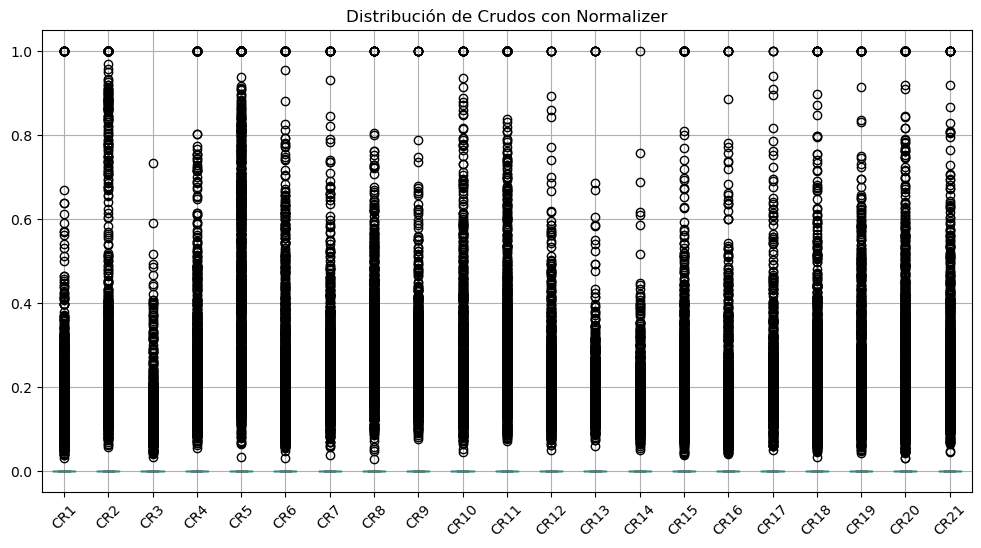

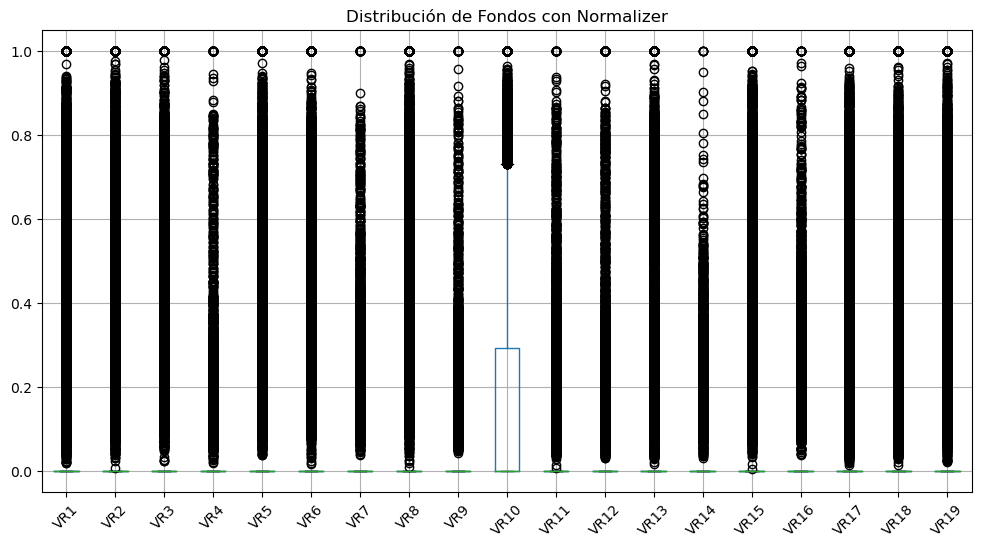

In [33]:
from sklearn.preprocessing import Normalizer

# Crear instancias del normalizador
normalizer_crudos = Normalizer()
normalizer_fondos = Normalizer()

# Normalizar cada subconjunto de datos
dt_Supp_spect_crudos_normalized = normalizer_crudos.fit_transform(dt_Supp_spect_crudos)
dt_Supp_spect_fondos_normalized = normalizer_fondos.fit_transform(dt_Supp_spect_fondos)

# Convertir a DataFrame
dt_Supp_spect_crudos_normalized = pd.DataFrame(dt_Supp_spect_crudos_normalized, columns=dt_Supp_spect_crudos.columns)
dt_Supp_spect_fondos_normalized = pd.DataFrame(dt_Supp_spect_fondos_normalized, columns=dt_Supp_spect_fondos.columns)

# Visualizar boxplots
plt.figure(figsize=(12, 6))
dt_Supp_spect_crudos_normalized.boxplot()
plt.title('Distribución de Crudos con Normalizer')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
dt_Supp_spect_fondos_normalized.boxplot()
plt.title('Distribución de Fondos con Normalizer')
plt.xticks(rotation=45)
plt.show()



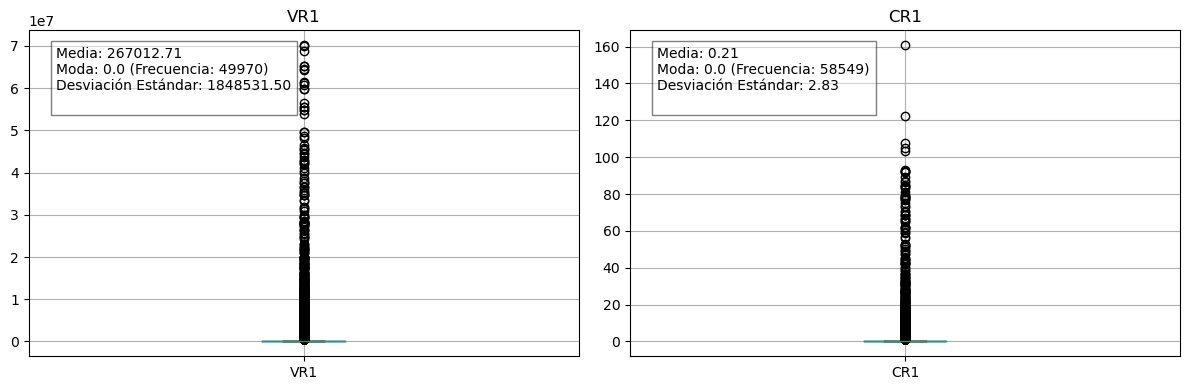

In [5]:
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
plt.figure(figsize=(12, 4))

# Boxplot para la columna 'VR1'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
dt_Supp_spect.boxplot(column=['VR1'])
mean = dt_Supp_spect['VR1'].mean()
mode = dt_Supp_spect['VR1'].mode().iloc[0]
mode_count = dt_Supp_spect['VR1'].value_counts().max()
std_dev = dt_Supp_spect['VR1'].std()
info_text = f"Media: {mean:.2f}\nModa: {mode} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('VR1')

# Boxplot para la columna 'CR1'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
dt_Supp_spect.boxplot(column=['CR1'])
mean = dt_Supp_spect['CR1'].mean()
mode = dt_Supp_spect['CR1'].mode().iloc[0]
mode_count = dt_Supp_spect['CR1'].value_counts().max()
std_dev = dt_Supp_spect['CR1'].std()
info_text = f"Media: {mean:.2f}\nModa: {mode} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('CR1')

# Mostrar los gráficos y guardar la figura
plt.tight_layout()
plt.savefig('Graficas/Boxplot_CR_FV_info.png')
plt.show()


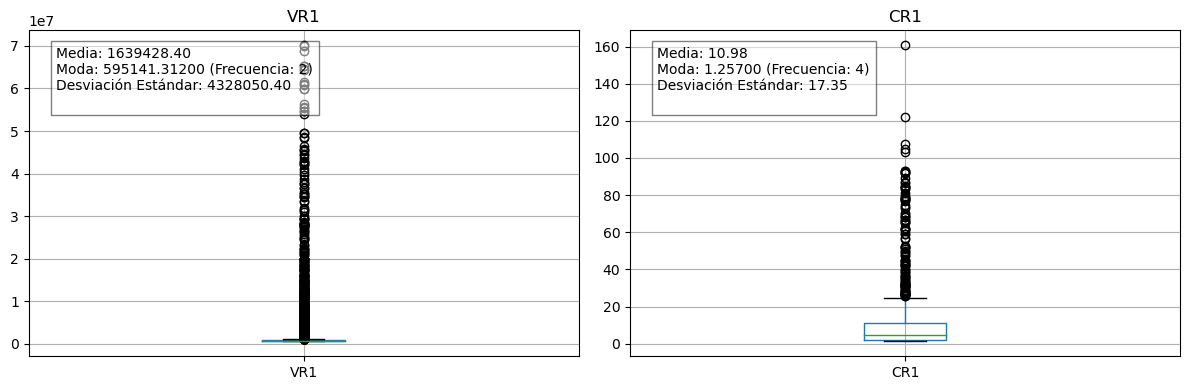

In [6]:
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
plt.figure(figsize=(12, 4))

# Boxplot para la columna 'VR1'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
dt_Supp_spect_filtered_VR1 = dt_Supp_spect[dt_Supp_spect['VR1'] != 0]
dt_Supp_spect_filtered_VR1.boxplot(column=['VR1'])
mean = dt_Supp_spect_filtered_VR1['VR1'].mean()
mode = dt_Supp_spect_filtered_VR1['VR1'].mode().iloc[0]
mode_count = dt_Supp_spect_filtered_VR1['VR1'].value_counts().max()
std_dev = dt_Supp_spect_filtered_VR1['VR1'].std()
info_text = f"Media: {mean:.2f}\nModa: {mode:.5f} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('VR1')

# Boxplot para la columna 'CR1'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
dt_Supp_spect_filtered_CR1 = dt_Supp_spect[dt_Supp_spect['CR1'] != 0]
dt_Supp_spect_filtered_CR1.boxplot(column=['CR1'])
mean = dt_Supp_spect_filtered_CR1['CR1'].mean()
mode = dt_Supp_spect_filtered_CR1['CR1'].mode().iloc[0]
mode_count = dt_Supp_spect_filtered_CR1['CR1'].value_counts().max()
std_dev = dt_Supp_spect_filtered_CR1['CR1'].std()
info_text = f"Media: {mean:.2f}\nModa: {mode:.5f} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('CR1')

# Mostrar los gráficos y guardar la figura
plt.tight_layout()
plt.savefig('Graficas/Boxplot_CR_FV_info_no_zeros.png')
plt.show()


In [7]:
# Eliminar las filas en las que todas las columnas tengan el valor de 0
print("Antiguo tamaño",dt_Supp_spect.shape)
dt_Supp_spect_sin_zeros = dt_Supp_spect.replace(0, np.nan).dropna(how='all')

# Verificar el nuevo tamaño del DataFrame
print("Nuevo tamaño", dt_Supp_spect_sin_zeros.shape)
print("Diff= ",dt_Supp_spect.shape[0]-dt_Supp_spect_sin_zeros.shape[0]) 

dt_Supp_spect_sin_zeros.head()


Antiguo tamaño (59692, 40)
Nuevo tamaño (55154, 40)
Diff=  4538


CR1     CR2     CR3     CR4     CR5     CR6     CR7     CR8     CR9  \
0  16.122  28.754  11.208  24.784   2.360   2.252   2.612   2.020  17.854   
1  30.101  35.596  18.767  36.845  10.718   7.076  10.005  11.003  35.712   
2  38.500  54.152  30.508  55.708  25.710  16.029  22.088  28.136  50.344   
3  31.574  43.425  27.087  41.362  43.697  36.075  39.573  46.366  35.953   
4  52.324  62.510  40.397  57.982  37.720  24.171  25.059  41.800  63.023   

     CR10  ...  VR10  VR11  VR12  VR13  VR14  VR15  VR16  VR17  VR18  VR19  
0  15.985  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  28.735  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  41.754  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  30.995  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  40.590  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 40 columns]

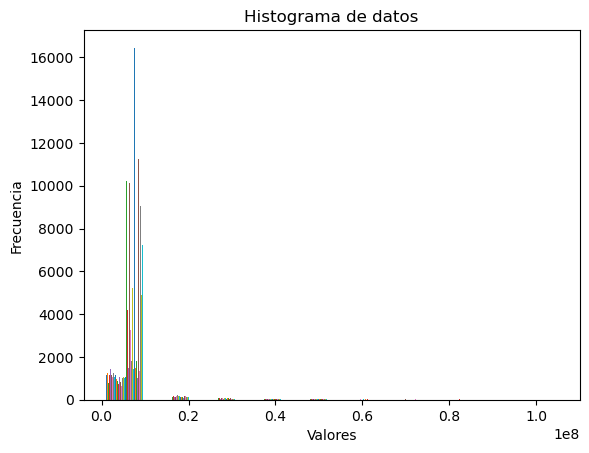

In [13]:
plt.hist(dt_Supp_spect_sin_zeros)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos')
plt.show()

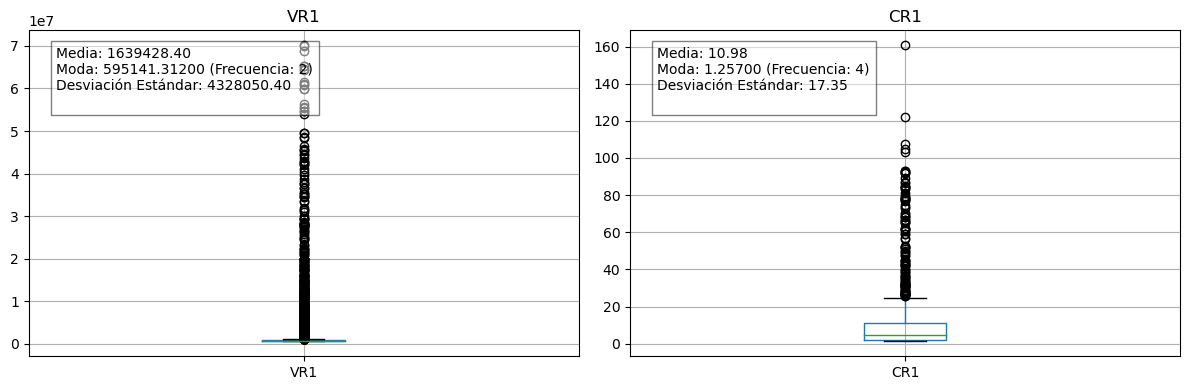

In [41]:
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
plt.figure(figsize=(12, 4))

# Boxplot para la columna 'VR1'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
dt_Supp_spect_filtered_VR1 = dt_Supp_spect_sin_todos_zeros[dt_Supp_spect_sin_todos_zeros['VR1'] != 0]
dt_Supp_spect_filtered_VR1.boxplot(column=['VR1'])
mean = dt_Supp_spect_filtered_VR1['VR1'].mean()
mode = dt_Supp_spect_filtered_VR1['VR1'].mode().iloc[0]
mode_count = dt_Supp_spect_filtered_VR1['VR1'].value_counts().max()
std_dev = dt_Supp_spect_filtered_VR1['VR1'].std()
info_text = f"Media: {mean:.2f}\nModa: {mode:.5f} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('VR1')

# Boxplot para la columna 'CR1'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
dt_Supp_spect_filtered_CR1 = dt_Supp_spect_sin_todos_zeros[dt_Supp_spect_sin_todos_zeros['CR1'] != 0]
dt_Supp_spect_filtered_CR1.boxplot(column=['CR1'])
mean = dt_Supp_spect_filtered_CR1['CR1'].mean()
mode = dt_Supp_spect_filtered_CR1['CR1'].mode().iloc[0]
mode_count = dt_Supp_spect_filtered_CR1['CR1'].value_counts().max()
std_dev = dt_Supp_spect_filtered_CR1['CR1'].std()
info_text = f"Media: {mean:.2f}\nModa: {mode:.5f} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('CR1')

# Mostrar los gráficos y guardar la figura
plt.tight_layout()
plt.savefig('Graficas/Boxplot_CR_FV_info_no_zeros.png')
plt.show()


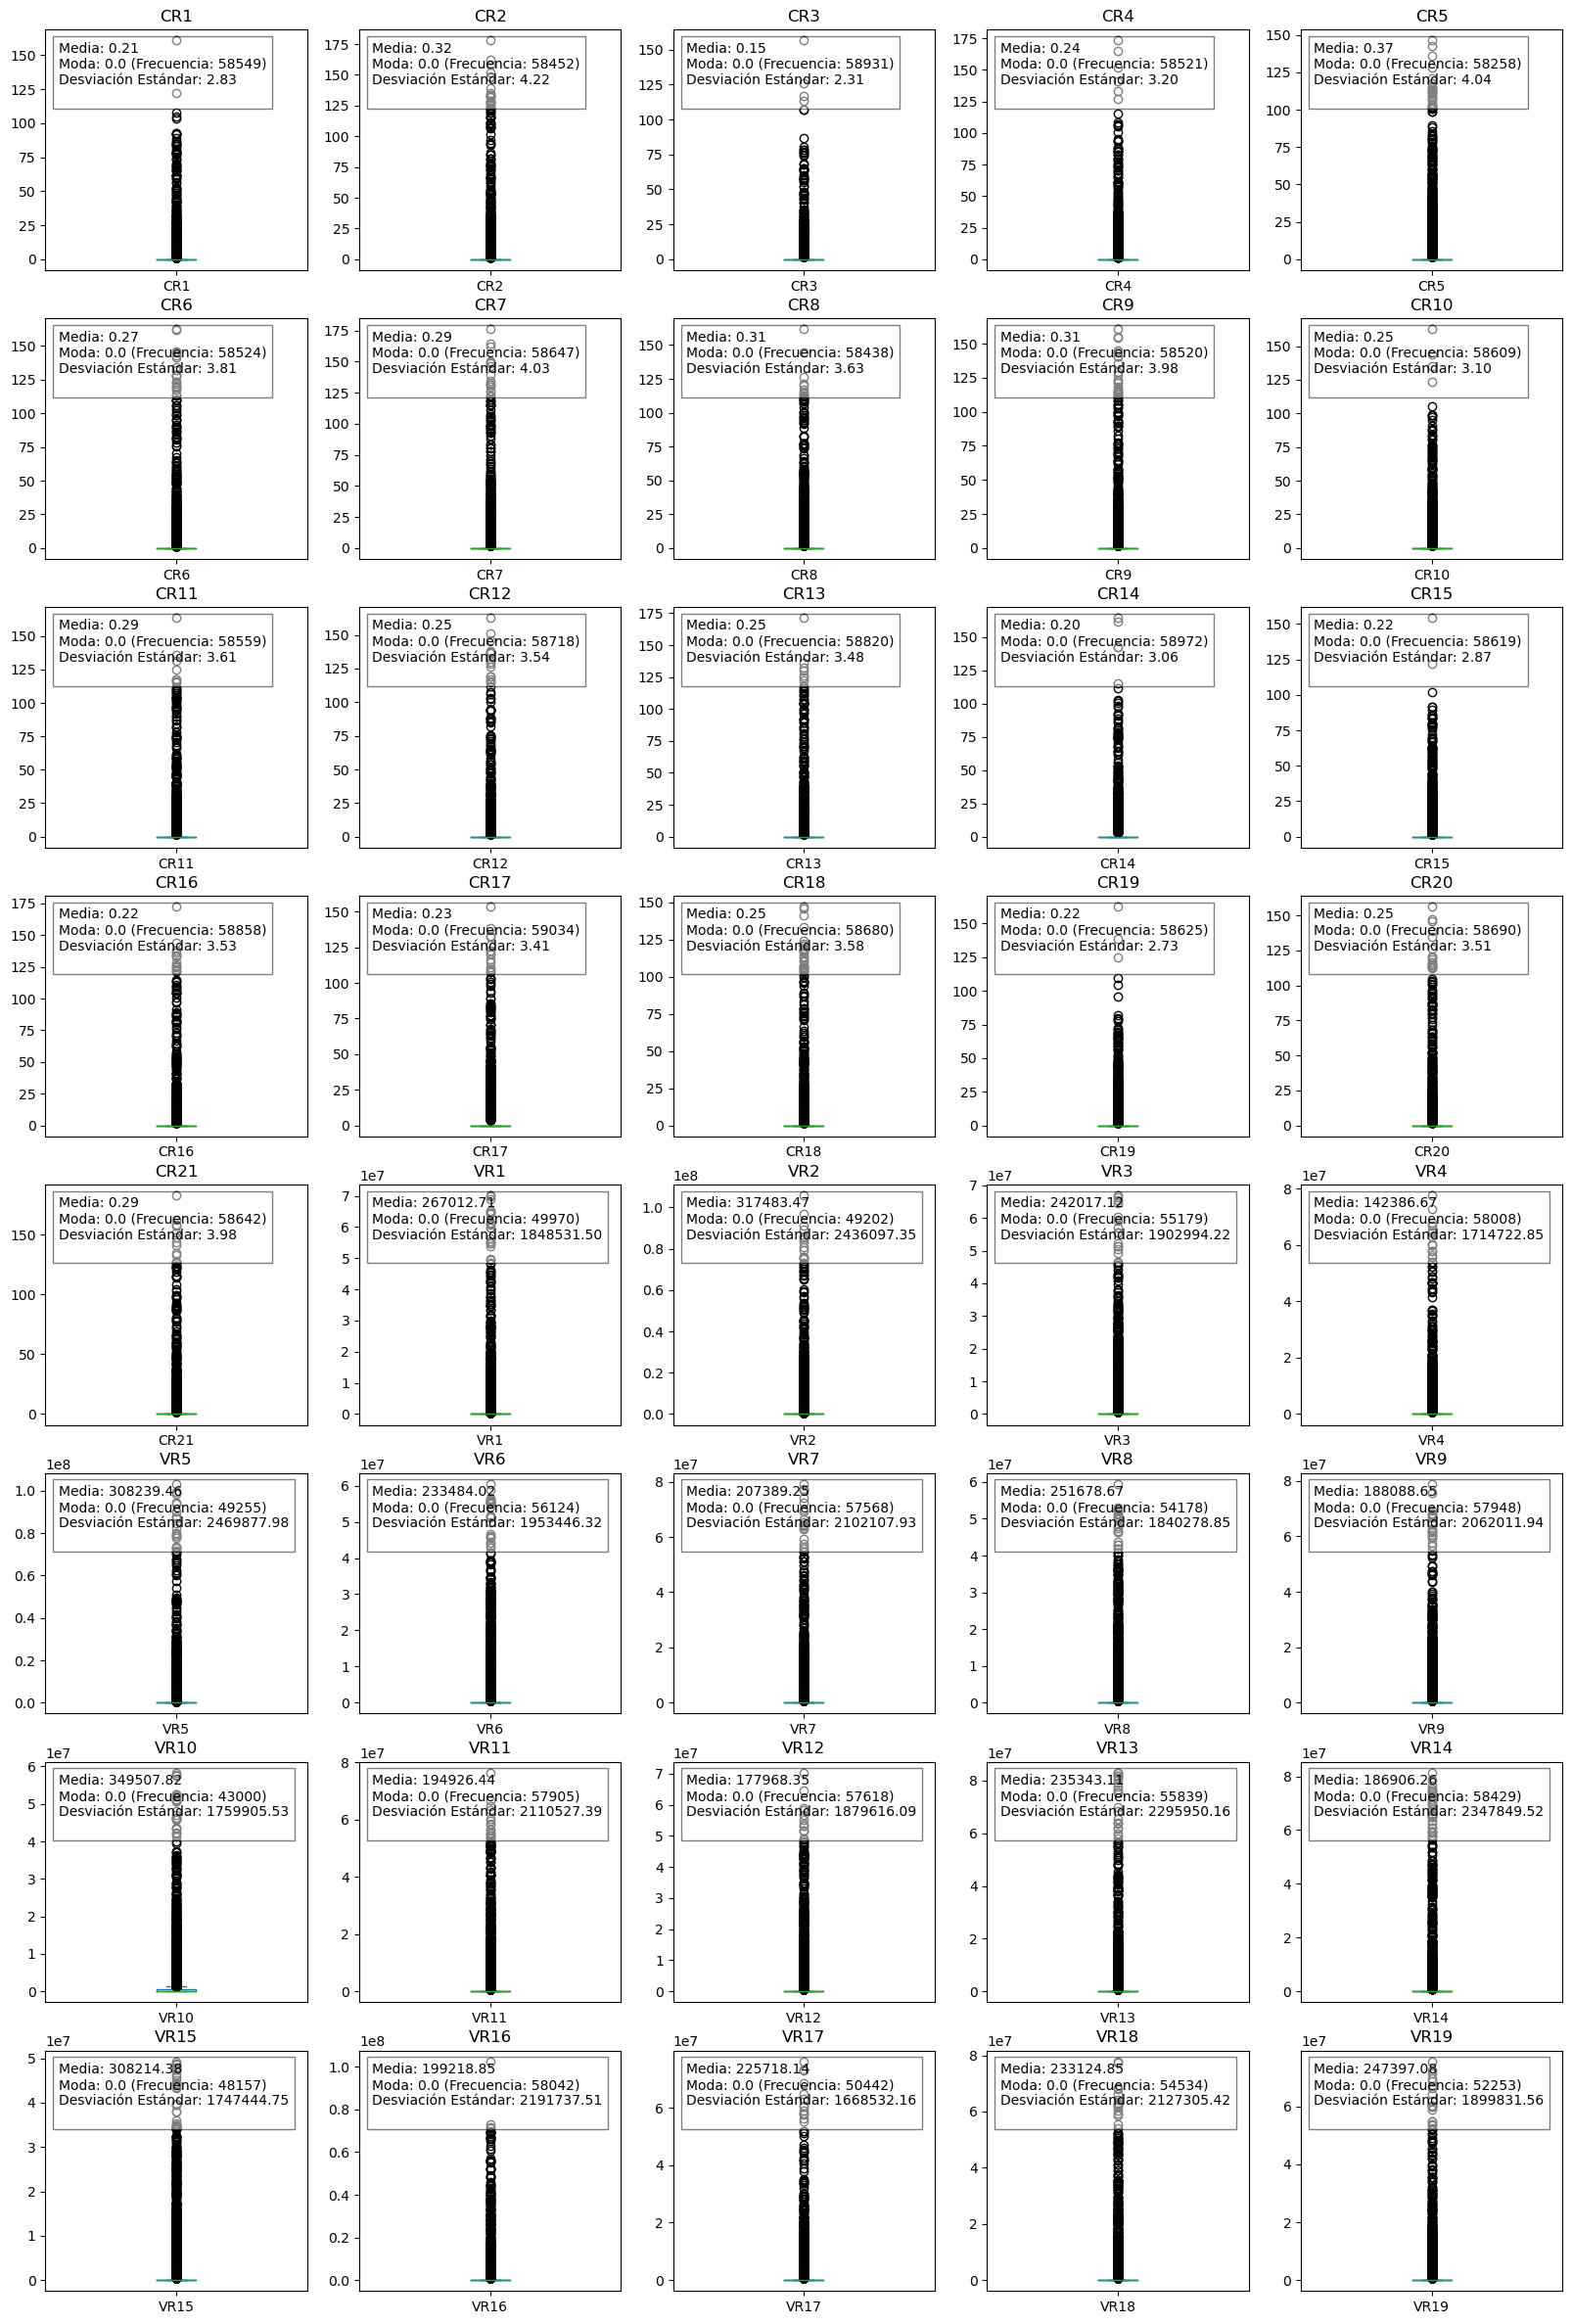

In [6]:
import matplotlib.pyplot as plt

# Especifica el tamaño de la figura para cada boxplot
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))  # subplot8*5

for i, column in enumerate(dt_Supp_spect.columns):
    row_index = i // 5 
    col_index = i % 5  
    dt_Supp_spect[column].plot(kind='box', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(column) 
    
    # Calcular Informacion
    mean = dt_Supp_spect[column].mean()
    mode = dt_Supp_spect[column].mode().iloc[0]  
    mode_count = dt_Supp_spect[column].value_counts().max()  
    std_dev = dt_Supp_spect[column].std()
    
    # Mostrar informacion
    info_text = f"Media: {mean:.2f}\nModa: {mode} (Frecuencia: {mode_count})\nDesviación Estándar: {std_dev:.2f}\n"
    axes[row_index, col_index].text(0.05, 0.95, info_text, transform=axes[row_index, col_index].transAxes,
                                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Guarda la figura como una imagen única
plt.savefig('Graficas/BoxplotsCrudosFondos.png')  

# Muestra los gráficos
plt.show()

In [7]:
#Dt_Supp_spect - Transpuesta valuesTranspose Valt
valt=dt_Supp_spect.transpose() 
print(type(valt))
print(valt.shape)
valt = valt.loc[:, (valt != 0).any(axis=0)]
dt_Supp_spect = valt.transpose()
print(dt_Supp_spect.shape)
print("Diff", valt.shape[1])
print("Diff", dt_Supp_spect.shape[0])



dt_Supp_spect.head()

<class 'pandas.core.frame.DataFrame'>
(40, 59692)
(55154, 40)
Diff 55154
Diff 55154


CR1     CR2     CR3     CR4     CR5     CR6     CR7     CR8     CR9  \
0  16.122  28.754  11.208  24.784   2.360   2.252   2.612   2.020  17.854   
1  30.101  35.596  18.767  36.845  10.718   7.076  10.005  11.003  35.712   
2  38.500  54.152  30.508  55.708  25.710  16.029  22.088  28.136  50.344   
3  31.574  43.425  27.087  41.362  43.697  36.075  39.573  46.366  35.953   
4  52.324  62.510  40.397  57.982  37.720  24.171  25.059  41.800  63.023   

     CR10  ...  VR10  VR11  VR12  VR13  VR14  VR15  VR16  VR17  VR18  VR19  
0  15.985  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1  28.735  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  41.754  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3  30.995  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4  40.590  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 40 columns]

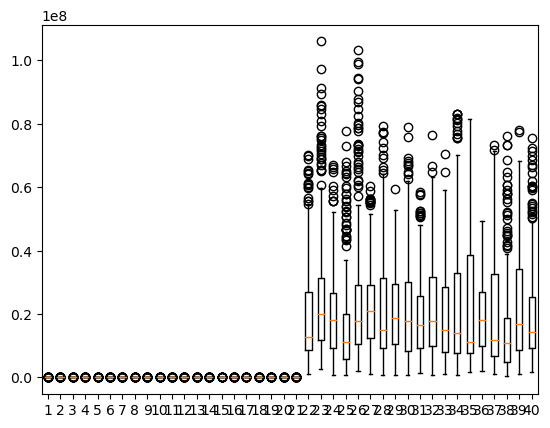

In [8]:
dt_Supp_spect.replace(0, np.nan, inplace=True)
plt.boxplot(dt_Supp_spect.dropna())  # dropna() elimina los NaN antes de hacer el boxplot
plt.show()

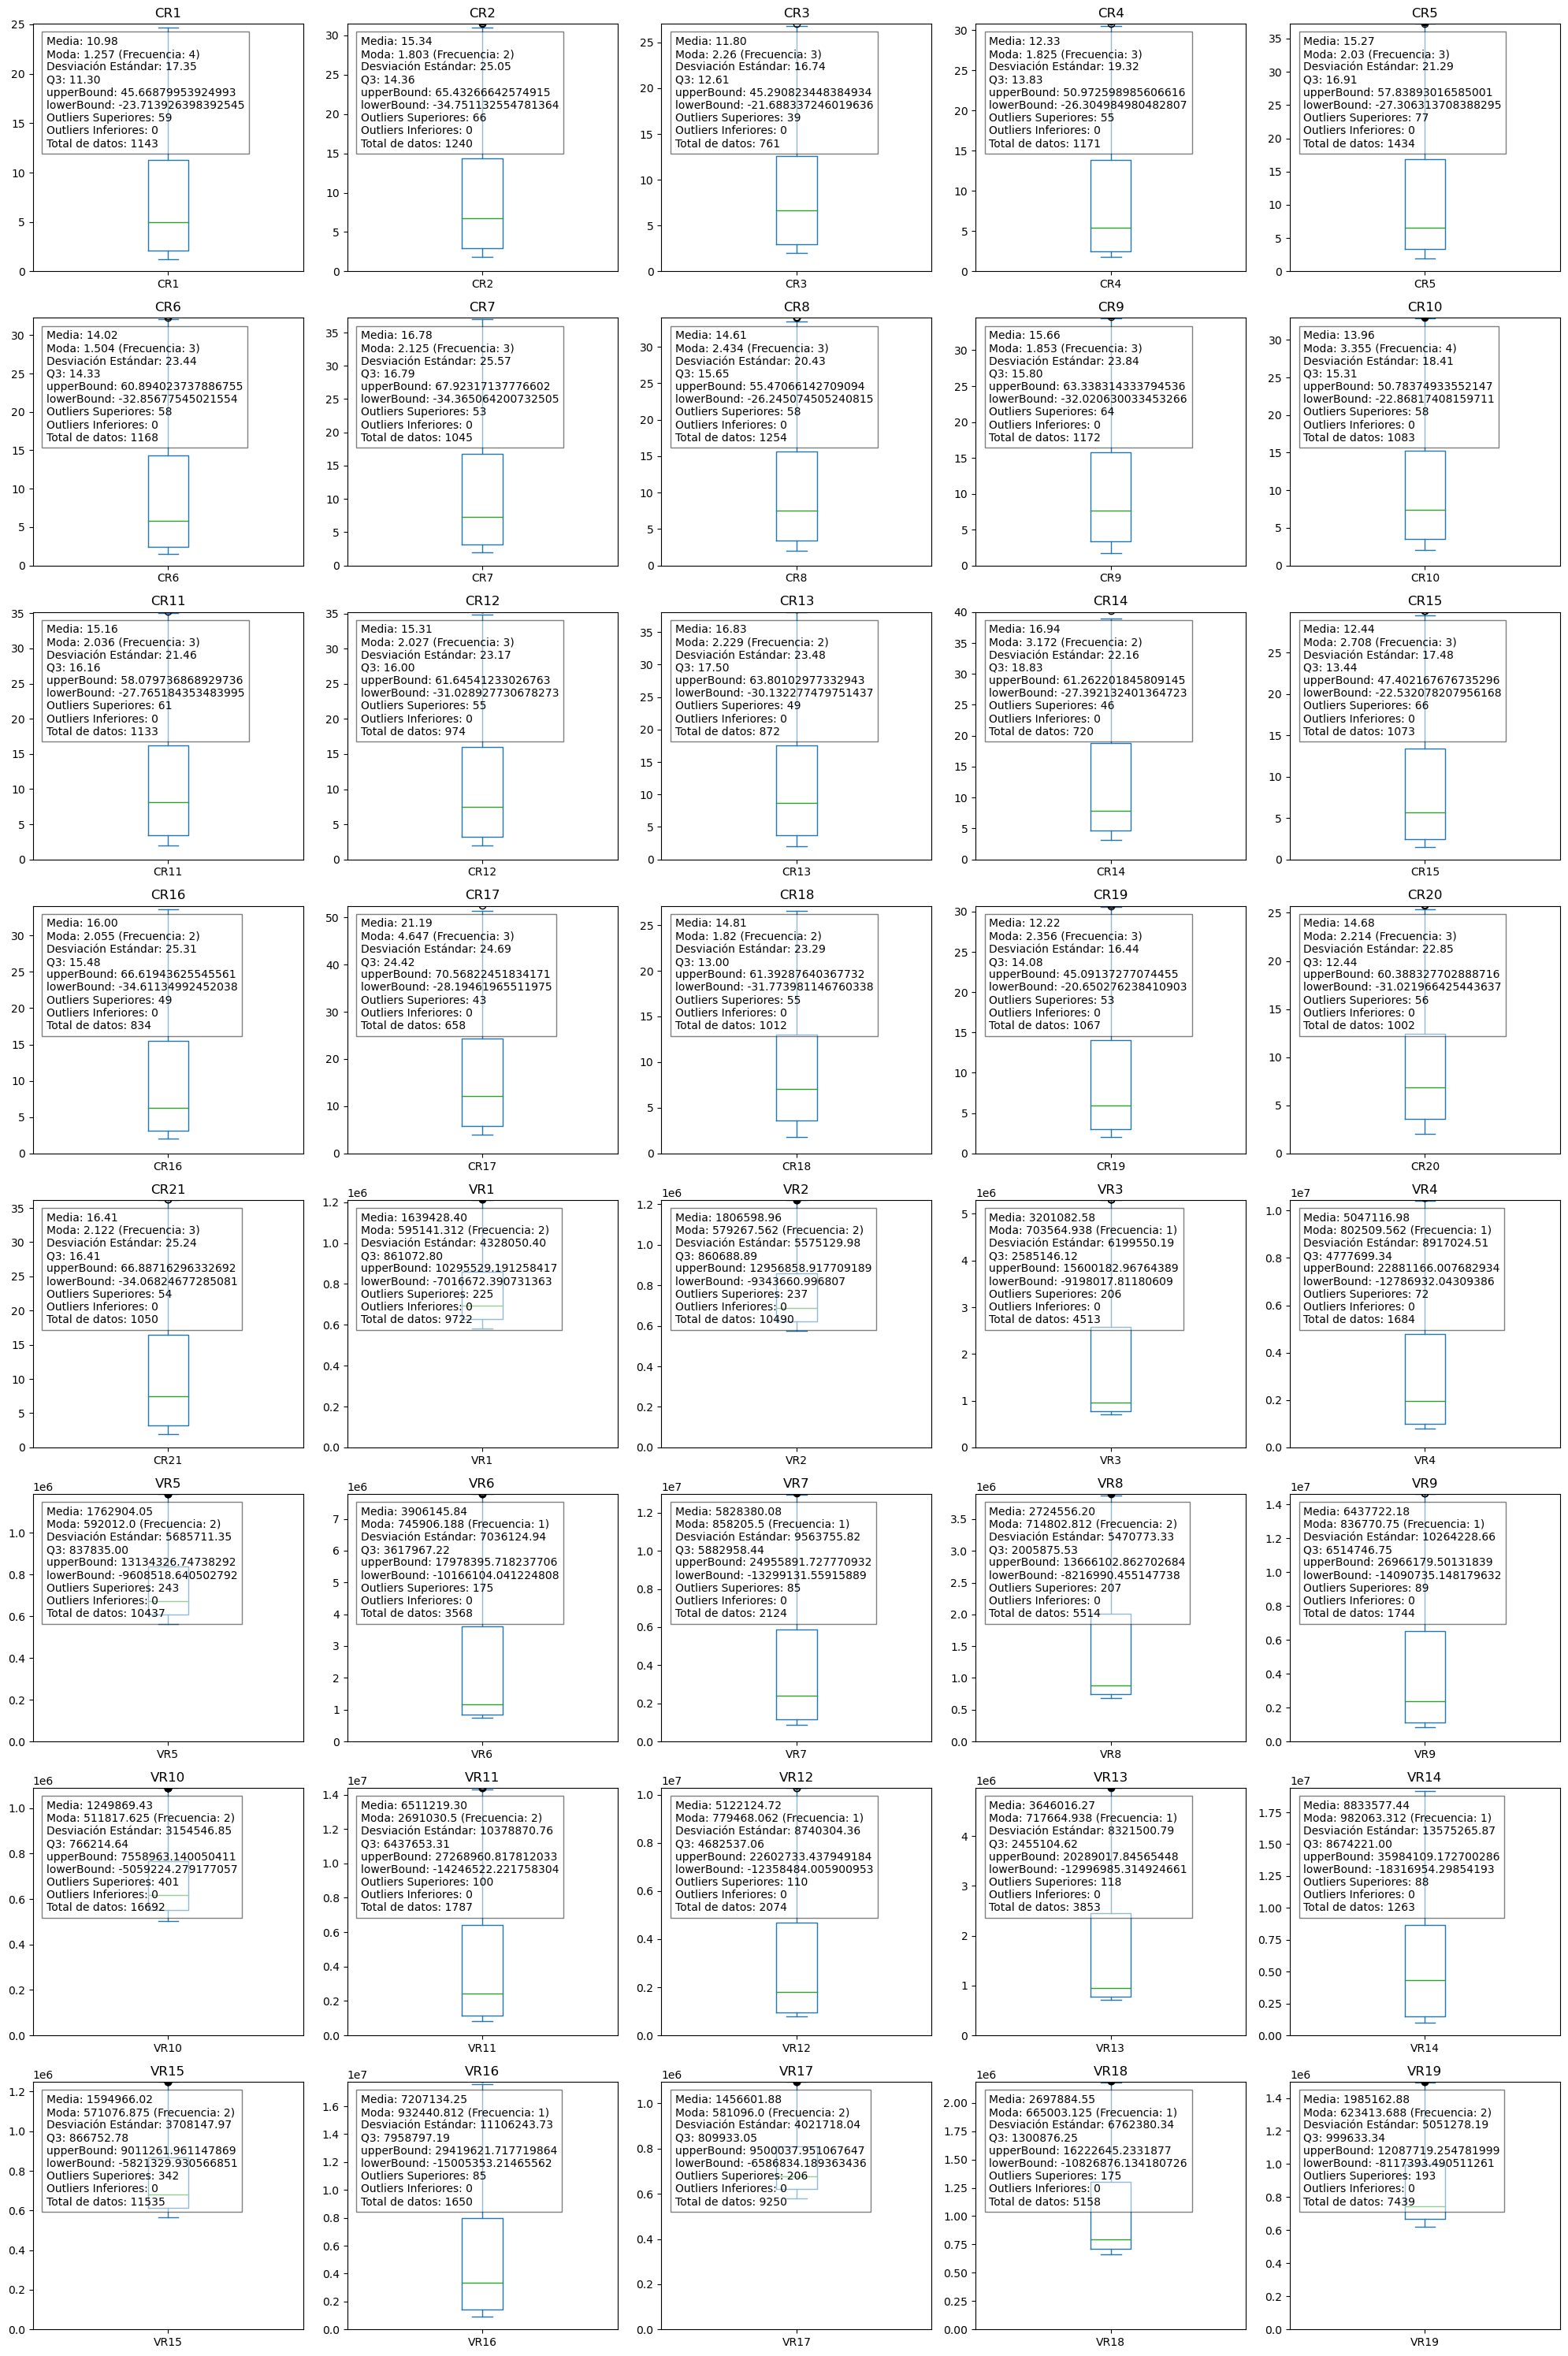

In [9]:
import matplotlib.pyplot as plt

# Especifica el tamaño de la figura para cada boxplot
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))  # 8 filas y 5 columnas

# Itera sobre cada columna y genera el boxplot correspondiente
for i, column in enumerate(dt_Supp_spect.columns):
    row_index = i // 5  # fila actual
    col_index = i % 5   # columna actual
    dt_Supp_spect[column].plot(kind='box', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(column) 
    
    # Calcular media, moda, desviación estándar, Q3, y cantidad de datos fuera de Q3
    mean = dt_Supp_spect[column].mean()
    mode = dt_Supp_spect[column].mode().iloc[0]  # Puede haber más de una moda, tomamos la primera
    mode_count = dt_Supp_spect[column].value_counts().max() 
    std_dev = dt_Supp_spect[column].std()
    q3 = dt_Supp_spect[column].quantile(0.75)  
    upperBound= mean+2*std_dev
    lowerBound= mean-2*std_dev
    
    upperOutliers = dt_Supp_spect[column][dt_Supp_spect[column] > upperBound]
    lowerOutliers = dt_Supp_spect[column][dt_Supp_spect[column] < lowerBound]
    
    #Linea Superior
    upperLim= q3 + 1.5 * (q3 - dt_Supp_spect[column].quantile(0.25))

    # Obtener la cantidad de outliers
    count_outliers_upper = upperOutliers.count()
    count_outliers_lower = lowerOutliers.count()
    total_count = dt_Supp_spect[column].count()
    
    
    # Agregar información en texto
    info_text = f"Media: {mean:.2f}\n" \
                f"Moda: {mode} (Frecuencia: {mode_count})\n" \
                f"Desviación Estándar: {std_dev:.2f}\n" \
                f"Q3: {q3:.2f}\n" \
                f"upperBound: {upperBound}\n" \
                f"lowerBound: {lowerBound}\n" \
                f"Outliers Superiores: {count_outliers_upper}\n" \
                f"Outliers Inferiores: {count_outliers_lower}\n" \
                f"Total de datos: {total_count}"
    
    axes[row_index, col_index].text(0.05, 0.95, info_text, transform=axes[row_index, col_index].transAxes,
                                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # Establecer limite
    axes[row_index, col_index].set_ylim(0,upperLim)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Guarda la figura como una imagen única
plt.savefig('Graficas/BoxplotsCrudosFondosTrunked.png')

# Muestra los gráficos
plt.show()


## Datos a Analizar
##### Data/Supplementary_CCR_spectra.csv

In [29]:
#import target 40 muestras (masas)(Crudos y Fondos/Vacios)
#Dataframe Supplementary_CCR_properties
dt_Supp_Prop = pd.read_csv('Data/Supplementary_CCR_properties.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Supp_Prop.shape)
print('#'*85)
print(dt_Supp_Prop.dtypes)
print('#'*85)
print(dt_Supp_Prop.head()) #print dt frame

shape:  (40, 2)
#####################################################################################
Samples       object
CCR (wt%)    float64
dtype: object
#####################################################################################
  Samples  CCR (wt%)
0     CR1      12.94
1     CR2       4.34
2     CR3       9.67
3     CR4       7.03
4     CR5      17.84


In [46]:
#Valores del datasetTotal

media = dt_Supp_Prop['CCR (wt%)'].mean()
varianza = dt_Supp_Prop['CCR (wt%)'].var()
moda = dt_Supp_Prop['CCR (wt%)'].mode()[0]
valorMayor = dt_Supp_Prop['CCR (wt%)'].max()
valorMenor = dt_Supp_Prop['CCR (wt%)'].min()
percentil_25 = dt_Supp_Prop['CCR (wt%)'].quantile(0.25)
percentil_75 = dt_Supp_Prop['CCR (wt%)'].quantile(0.75)

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Valor Mayor: {valorMayor}")
print(f"Valor Menor: {valorMenor}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

Media: 16.724000000000004
Varianza: 96.63420923076926
Moda: 3.38
Valor Mayor: 37.6
Valor Menor: 3.38
Percentil 25: 8.2775
Percentil 75: 22.4


In [47]:
#Valores de la primera mitad del dataset CR

grupoCR = dt_Supp_Prop.iloc[:21]
print('shape: ',grupoCR.shape)
grupoCR.head()

media = grupoCR['CCR (wt%)'].mean()
varianza = grupoCR['CCR (wt%)'].var()
moda = grupoCR['CCR (wt%)'].mode()[0]
valorMayor = grupoCR['CCR (wt%)'].max()
valorMenor = grupoCR['CCR (wt%)'].min()
percentil_25 = grupoCR['CCR (wt%)'].quantile(0.25)
percentil_75 = grupoCR['CCR (wt%)'].quantile(0.75)

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Valor Mayor: {valorMayor}")
print(f"Valor Menor: {valorMenor}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

shape:  (21, 2)
Media: 9.102857142857143
Varianza: 18.894951428571424
Moda: 3.38
Valor Mayor: 17.84
Valor Menor: 3.38
Percentil 25: 5.34
Percentil 75: 11.8


In [45]:
#Valores de la segunda mitad del dataset VR


grupoVR = dt_Supp_Prop.iloc[21:]
print('shape: ',grupoVR.shape)
grupoVR.head()

media = grupoVR['CCR (wt%)'].mean()
varianza = grupoVR['CCR (wt%)'].var()
moda = grupoVR['CCR (wt%)'].mode()[0]
valorMayor = grupoVR['CCR (wt%)'].max()
valorMenor = grupoVR['CCR (wt%)'].min()
percentil_25 = grupoVR['CCR (wt%)'].quantile(0.25)
percentil_75 = grupoVR['CCR (wt%)'].quantile(0.75)

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Valor Mayor: {valorMayor}")
print(f"Valor Menor: {valorMenor}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

shape:  (19, 2)
Media: 25.147368421052636
Varianza: 45.722631578947365
Moda: 13.5
Valor Mayor: 37.6
Valor Menor: 13.5
Percentil 25: 20.5
Percentil 75: 30.35


In [5]:
#import target (SARA) 40 muestras (masas)(Crudos, Fondos/Vacios y Gases)
#Dataframe Supplementary_CCR_properties
dt_Propiedad_SARA = pd.read_csv('Data/Crudos_Fondos_Propiedades_NombresyEtiquetas.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Propiedad_SARA.shape)
dt_Propiedad_SARA.head()#print dt frame

shape:  (35, 44)


Unnamed: 0  27020 rub    6607lis1      cdotk  007847pal          ch971  \
0        NaN         S1          S2         S4        NaN             S5   
1        NaN   Rubiales  Lisama 165    Teca 62    Palagua  Chichimene 97   
2        NaN  200789673   200826607  200866254  201010735      200820720   
3        NaN      CRUDO       CRUDO     CRUDO*      CRUDO          CRUDO   
4   ANALISIS         °C          °C         °C         °C             °C   

       nut35       sn120         c801             0304v1  ... Unnamed: 34  \
0         S6          S7           S8                 S9  ...        FV13   
1  Nutria 35  Santos 120  Castilla 80  Vasconia-Tropomix  ...    Trasgo 1   
2  200825159   200825157    200823420          200798220  ...   200817187   
3      CRUDO       CRUDO       CRUDO*              CRUDO  ...         FON   
4         °C          °C           °C                 °C  ...        530+   

       Unnamed: 35   Unnamed: 36       Unnamed: 37        Unnamed: 38  \
0             FV14          FV15              FV16               FV17   
1  Aullador 1 DST2  Tisquirama 7  San Francisco 17  Mezcla parafínica   
2        200898545     200873436             #REF!              #REF!   
3              FON           FON               FON                FON   
4             530+         530.+              545+             521.5+   

    Unnamed: 39       Unnamed: 40 Unnamed: 41  Unnamed: 42  cse  
0          FV18              FV19         NaN          NaN  NaN  
1  San Fernando  Andalucia sur 10   Tesoro 43  San Roque 3  CSE  
2     200939838         200885472       #REF!    200885486  NaN  
3           FON               FON         FON          FON  NaN  
4          533+              539+        548+       512.2+  NaN  

[5 rows x 44 columns]

In [6]:
dt_Propiedad_SARA.drop(dt_Propiedad_SARA.loc[1:30].index, inplace=True)

In [7]:
dt_Propiedad_SARA=dt_Propiedad_SARA.transpose()
dt_Propiedad_SARA

0                  31                  32  \
Unnamed: 0                      NaN     Saturados (%w)     Aromáticos (%w)   
27020 rub                        S1              33.88               34.12   
6607lis1                         S2               31.0                35.7   
cdotk                            S4               25.0                39.7   
007847pal                       NaN               33.6                33.5   
ch971                            S5               12.9                40.9   
nut35                            S6               30.2                19.3   
sn120                            S7               28.1                30.8   
c801                             S8               21.5                36.9   
0304v1                           S9               33.1                30.3   
3049m-1041                      S10               20.4                31.2   
29749 climon                    NaN               36.3                32.4   
48459 f1                        S11              36.62               33.69   
4988acae1                       S12               29.9                31.5   
0676trasg1                      S13               29.5                26.0   
1681aull1                       S14               21.6                29.5   
Unnamed: 16                     S15               25.3                40.0   
CdoT43        SUBMISSION: 100132179               34.8                15.8   
0896snr31                       NaN               23.3                36.7   
33757 sfco                      S16               33.6                28.6   
3359cu1                         S17               34.5                 9.4   
7285sf1                         S18               14.5                41.4   
and1                            S19               30.4                22.7   
Unnamed: 23                     FV1              11.72               41.58   
Unnamed: 24                     FV2               14.5                49.1   
Unnamed: 25                     FV4                5.3                36.2   
Unnamed: 26                     FV5                4.0                33.3   
Unnamed: 27                     FV6               14.3                41.0   
Unnamed: 28                     FV7               14.9                49.3   
Unnamed: 29                     FV8                3.7                32.1   
Unnamed: 30                     FV9               10.8                37.9   
Unnamed: 31                    FV10                7.9                44.9   
Unnamed: 32                    FV11              13.22               38.09   
Unnamed: 33                    FV12                7.6                52.8   
Unnamed: 34                    FV13                5.0                37.3   
Unnamed: 35                    FV14                9.2                38.6   
Unnamed: 36                    FV15               12.0                50.5   
Unnamed: 37                    FV16                7.9                51.4   
Unnamed: 38                    FV17               23.0                44.4   
Unnamed: 39                    FV18                4.0                39.5   
Unnamed: 40                    FV19                8.8                42.3   
Unnamed: 41                     NaN               13.4                51.9   
Unnamed: 42                     NaN                8.2                43.4   
cse                             NaN               35.2                33.3   

                           33                  34  
Unnamed: 0       Resinas (%w)     Asfaltenos (%w)  
27020 rub                8.78               11.59  
6607lis1                 13.4                 0.8  
cdotk                    21.5                 2.5  
007847pal                27.1                 1.1  
ch971                    19.4                17.3  
nut35                    11.2                 3.2  
sn120                    14.1                 3.1  
c801                     15.3                14.4  
03

In [8]:
#se eliminan estos valores, porque salen del espectro Sn, Fn (no necesariamente nulos)
dt_Propiedad_SARA = dt_Propiedad_SARA.drop(dt_Propiedad_SARA.index[[0,4,11,17,18,41,42,43]])
print(dt_Propiedad_SARA.shape)
dt_Propiedad_SARA

(36, 5)


0      31     32     33     34
27020 rub      S1  33.88  34.12   8.78  11.59
6607lis1       S2   31.0   35.7   13.4    0.8
cdotk          S4   25.0   39.7   21.5    2.5
ch971          S5   12.9   40.9   19.4   17.3
nut35          S6   30.2   19.3   11.2    3.2
sn120          S7   28.1   30.8   14.1    3.1
c801           S8   21.5   36.9   15.3   14.4
0304v1         S9   33.1   30.3   10.2    6.3
3049m-1041    S10   20.4   31.2   21.8    8.0
48459 f1      S11  36.62  33.69   9.96   9.78
4988acae1     S12   29.9   31.5    9.9    2.8
0676trasg1    S13   29.5   26.0   16.8   10.4
1681aull1     S14   21.6   29.5   10.4    4.0
Unnamed: 16   S15   25.3   40.0   16.9    4.8
33757 sfco    S16   33.6   28.6   11.5    2.5
3359cu1       S17   34.5    9.4    2.9    1.0
7285sf1       S18   14.5   41.4   18.5   16.2
and1          S19   30.4   22.7    9.3    4.7
Unnamed: 23   FV1  11.72  41.58  18.68  28.02
Unnamed: 24   FV2   14.5   49.1   30.7    5.8
Unnamed: 25   FV4    5.3   36.2   51.6    6.8
Unnamed: 26   FV5    4.0   33.3   33.2   29.5
Unnamed: 27   FV6   14.3   41.0   30.2   14.6
Unnamed: 28   FV7   14.9   49.3   29.5    6.3
Unnamed: 29   FV8    3.7   32.1   31.6   32.6
Unnamed: 30   FV9   10.8   37.9   29.9   21.3
Unnamed: 31  FV10    7.9   44.9   30.2   16.9
Unnamed: 32  FV11  13.22  38.09  19.70  28.99
Unnamed: 33  FV12    7.6   52.8   29.3   10.4
Unnamed: 34  FV13    5.0   37.3   30.3   27.5
Unnamed: 35  FV14    9.2   38.6   39.5   12.6
Unnamed: 36  FV15   12.0   50.5   25.9   11.7
Unnamed: 37  FV16    7.9   51.4   27.9   12.8
Unnamed: 38  FV17   23.0   44.4   18.2   14.4
Unnamed: 39  FV18    4.0   39.5   27.0   29.4
Unnamed: 40  FV19    8.8   42.3   30.9   18.0

Media: 18.606666666666666
Varianza: 113.1416
Moda: 4.0
Máximo: 36.62
Mínimo: 3.7


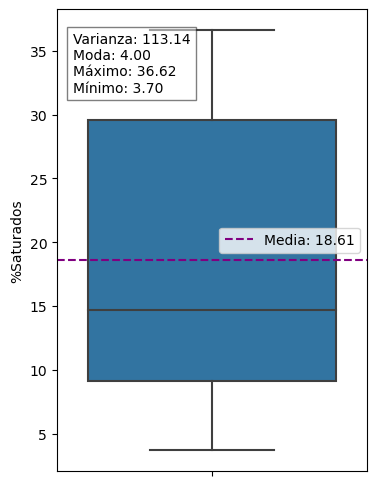

In [61]:
dt_targetSaturado=dt_Propiedad_SARA[31]
dt_targetSaturado=dt_targetSaturado.astype('float')

media = dt_targetSaturado.mean()
varianza = dt_targetSaturado.var()
moda = dt_targetSaturado.mode()[0]
maximo = dt_targetSaturado.max()
minimo = dt_targetSaturado.min()

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

# Creamos el boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(y=dt_targetSaturado)  
plt.axhline(media, color='purple', linestyle='--', label=f'Media: {media:.2f}')
plt.legend()
plt.ylabel('%Saturados')

info_text = f"Varianza: {varianza:.2f}\nModa: {moda:.2f}\nMáximo: {maximo:.2f}\nMínimo: {minimo:.2f}"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.savefig('Graficas/Boxplots%Saturados.png')
plt.show()


Media: 36.721666666666664
Varianza: 83.20045999999999
Moda: 9.4
Máximo: 52.8
Mínimo: 9.4


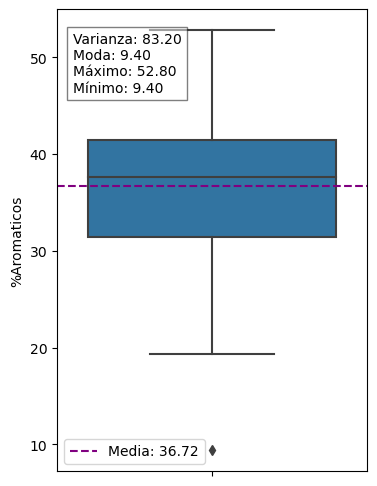

In [62]:
dt_targetAromatico=dt_Propiedad_SARA[32]
dt_targetAromatico=dt_targetAromatico.astype('float')

media = dt_targetAromatico.mean()
varianza = dt_targetAromatico.var()
moda = dt_targetAromatico.mode()[0]
maximo = dt_targetAromatico.max()
minimo = dt_targetAromatico.min()

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

# Creamos el boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(y=dt_targetAromatico)  
plt.axhline(media, color='purple', linestyle='--', label=f'Media: {media:.2f}')
plt.legend()
plt.ylabel('%Aromaticos')

info_text = f"Varianza: {varianza:.2f}\nModa: {moda:.2f}\nMáximo: {maximo:.2f}\nMínimo: {minimo:.2f}"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.savefig('Graficas/Boxplots%Aromaticos.png')
plt.show()



Media: 21.558888888888887
Varianza: 107.87250158730161
Moda: 30.2
Máximo: 51.6
Mínimo: 2.9


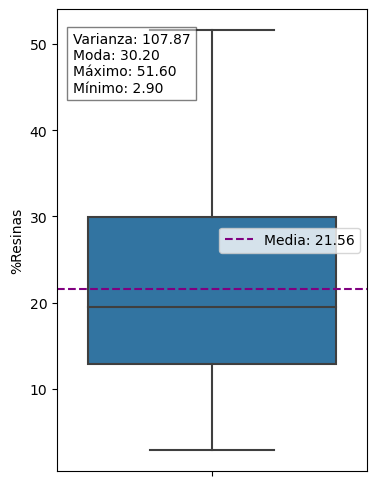

In [63]:
dt_targetResinas=dt_Propiedad_SARA[33]

dt_targetResinas=dt_targetResinas.astype('float')

media = dt_targetResinas.mean()
varianza = dt_targetResinas.var()
moda = dt_targetResinas.mode()[0]
maximo = dt_targetResinas.max()
minimo = dt_targetResinas.min()

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

# Creamos el boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(y=dt_targetResinas)  
plt.axhline(media, color='purple', linestyle='--', label=f'Media: {media:.2f}')
plt.legend()
plt.ylabel('%Resinas')

info_text = f"Varianza: {varianza:.2f}\nModa: {moda:.2f}\nMáximo: {maximo:.2f}\nMínimo: {minimo:.2f}"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.savefig('Graficas/Boxplots%Resinas.png')
plt.show()



Media: 12.527222222222221
Varianza: 86.13000920634921
Moda: 2.5
Máximo: 32.6
Mínimo: 0.8


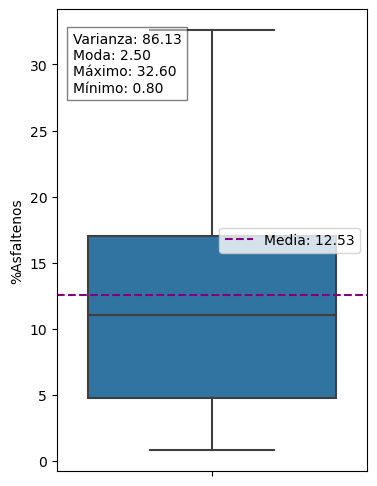

In [64]:
dt_targetAsfaltenos=dt_Propiedad_SARA[34]

dt_targetAsfaltenos=dt_targetAsfaltenos.astype('float')

media = dt_targetAsfaltenos.mean()
varianza = dt_targetAsfaltenos.var()
moda = dt_targetAsfaltenos.mode()[0]
maximo = dt_targetAsfaltenos.max()
minimo = dt_targetAsfaltenos.min()

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

# Creamos el boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(y=dt_targetAsfaltenos)  
plt.axhline(media, color='purple', linestyle='--', label=f'Media: {media:.2f}')
plt.legend()
plt.ylabel('%Asfaltenos')

info_text = f"Varianza: {varianza:.2f}\nModa: {moda:.2f}\nMáximo: {maximo:.2f}\nMínimo: {minimo:.2f}"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.savefig('Graficas/Boxplots%Asfaltenos.png')
plt.show()


## Segundo Dataset

In [49]:
#Dataset 60 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_List_Comp = pd.read_csv("Data/ListaComp_appi_CRFVVG.csv",sep=",", decimal=",") #import dtframe

print(dt_List_Comp.shape)
dt_List_Comp.head() #print dt frame

(11917, 64)


Formula Aducto  S1  S2  S3  S4  S5       S6  S7  S8  ...  VG13     VG14  \
0  C65H132    NaN   0   0   0   0   0  1576954   0   0  ...     0        0   
1   C21H42    NaN   0   0   0   0   0        0   0   0  ...     0        0   
2   C26H52    NaN   0   0   0   0   0        0   0   0  ...     0  1763382   
3   C27H54    NaN   0   0   0   0   0        0   0   0  ...     0        0   
4   C28H56    NaN   0   0   0   0   0  1237469   0   0  ...     0        0   

      VG15  VG16  VG17  VG18  VG19  VG20     VG21     VG22  
0        0     0     0     0     0     0        0        0  
1  1271067     0     0     0     0     0        0  1518163  
2  1477086     0     0     0     0     0        0  1320894  
3  1286113     0     0     0     0     0  1478918  1239124  
4  1167206     0     0     0     0     0  2057245  1249868  

[5 rows x 64 columns]

In [50]:
dt_List_Comp = dt_List_Comp.drop(['Aducto'], axis=1)
dt_List_Comp = dt_List_Comp.drop(['Formula'], axis=1)
print(dt_List_Comp.shape)
dt_List_Comp.head()

(11917, 62)


S1  S2  S3  S4  S5       S6  S7  S8  S9  S10  ...  VG13     VG14     VG15  \
0   0   0   0   0   0  1576954   0   0   0    0  ...     0        0        0   
1   0   0   0   0   0        0   0   0   0    0  ...     0        0  1271067   
2   0   0   0   0   0        0   0   0   0    0  ...     0  1763382  1477086   
3   0   0   0   0   0        0   0   0   0    0  ...     0        0  1286113   
4   0   0   0   0   0  1237469   0   0   0    0  ...     0        0  1167206   

   VG16  VG17  VG18  VG19  VG20     VG21     VG22  
0     0     0     0     0     0        0        0  
1     0     0     0     0     0        0  1518163  
2     0     0     0     0     0        0  1320894  
3     0     0     0     0     0  1478918  1239124  
4     0     0     0     0     0  2057245  1249868  

[5 rows x 62 columns]

In [51]:
print(dt_List_Comp.shape)
dt_List_Comp_Crudos = dt_List_Comp.iloc[:, :19]
print(dt_List_Comp_Crudos.shape)
dt_List_Comp_Crudos.head()

(11917, 62)
(11917, 19)


S1  S2  S3  S4  S5       S6  S7  S8  S9  S10  S11  S12  S13  S14      S15  \
0   0   0   0   0   0  1576954   0   0   0    0    0    0    0    0        0   
1   0   0   0   0   0        0   0   0   0    0    0    0    0    0        0   
2   0   0   0   0   0        0   0   0   0    0    0    0    0    0        0   
3   0   0   0   0   0        0   0   0   0    0    0    0    0    0  1091437   
4   0   0   0   0   0  1237469   0   0   0    0    0    0    0    0        0   

   S16  S17  S18  S19  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

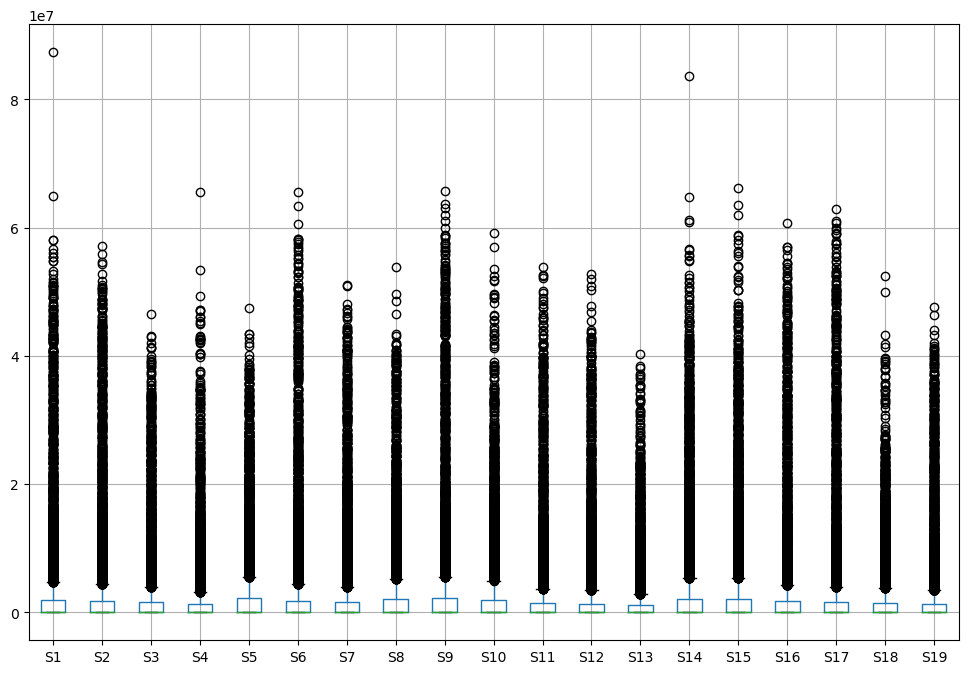

In [52]:
dt_List_Comp_Crudos = dt_List_Comp.iloc[:, :19]

plt.figure(figsize=(12, 8))
dt_List_Comp_Crudos.boxplot()
plt.savefig('Graficas/Boxplot_Crudos_CFG.png')
plt.show()


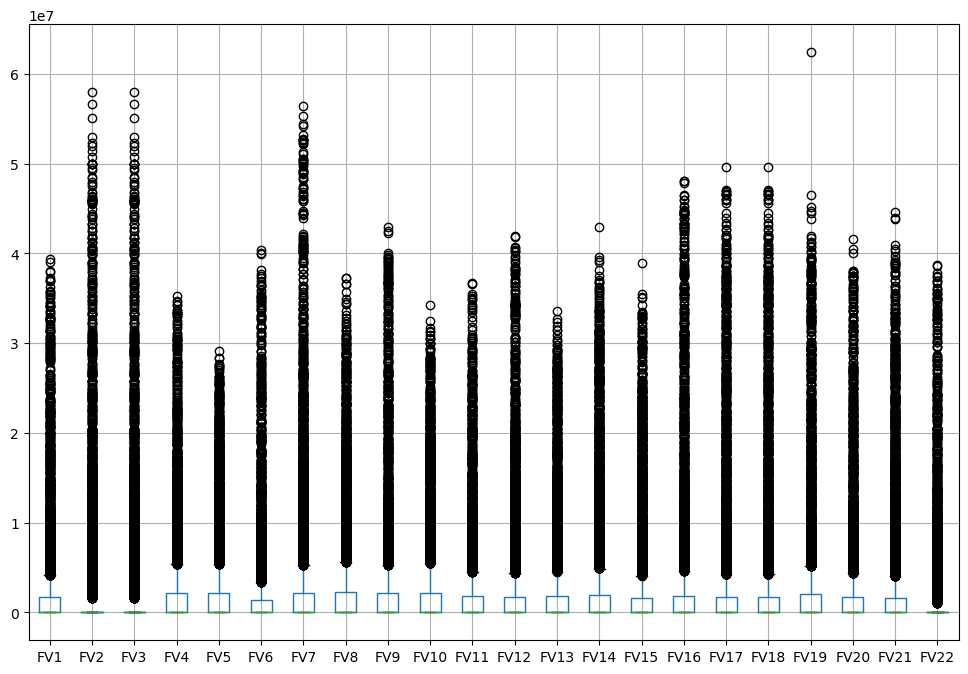

In [53]:
dt_List_Comp_Fondos = dt_List_Comp.iloc[:, 19:41]  # 19+22=41
plt.figure(figsize=(12, 8))
dt_List_Comp_Fondos.boxplot()
plt.savefig('Graficas/Boxplot_Fondos_CFG.png')
plt.show()


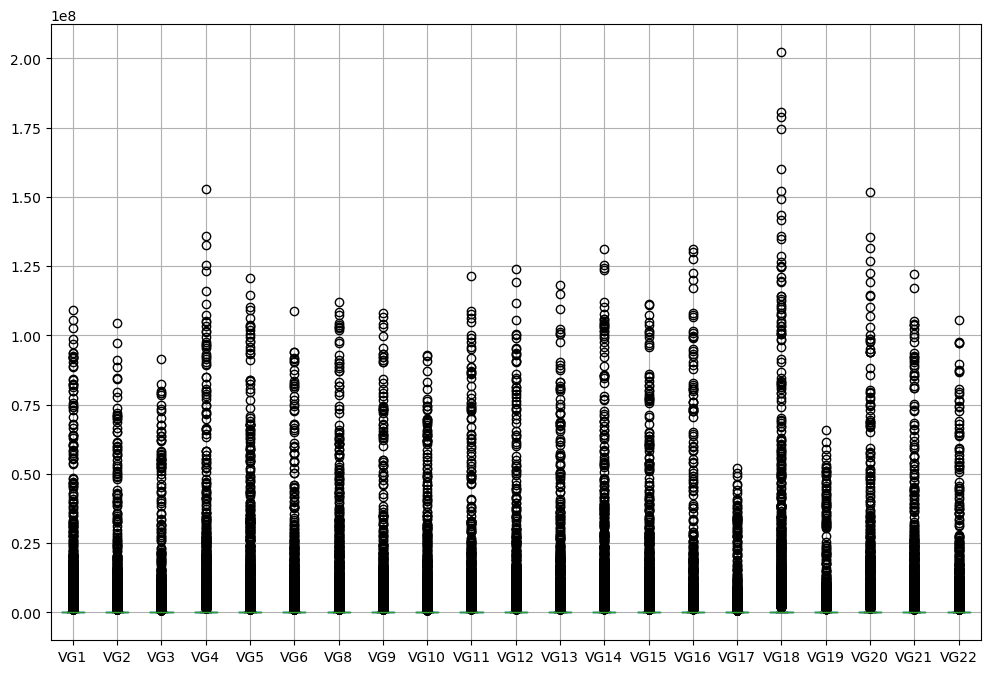

In [54]:
dt_List_Comp_Gas = dt_List_Comp.iloc[:,41:]  # Desde la fila 41 hasta el final
plt.figure(figsize=(12, 8))
dt_List_Comp_Gas.boxplot()
plt.savefig('Graficas/Boxplot_Crudos_CFG.png')

plt.show()


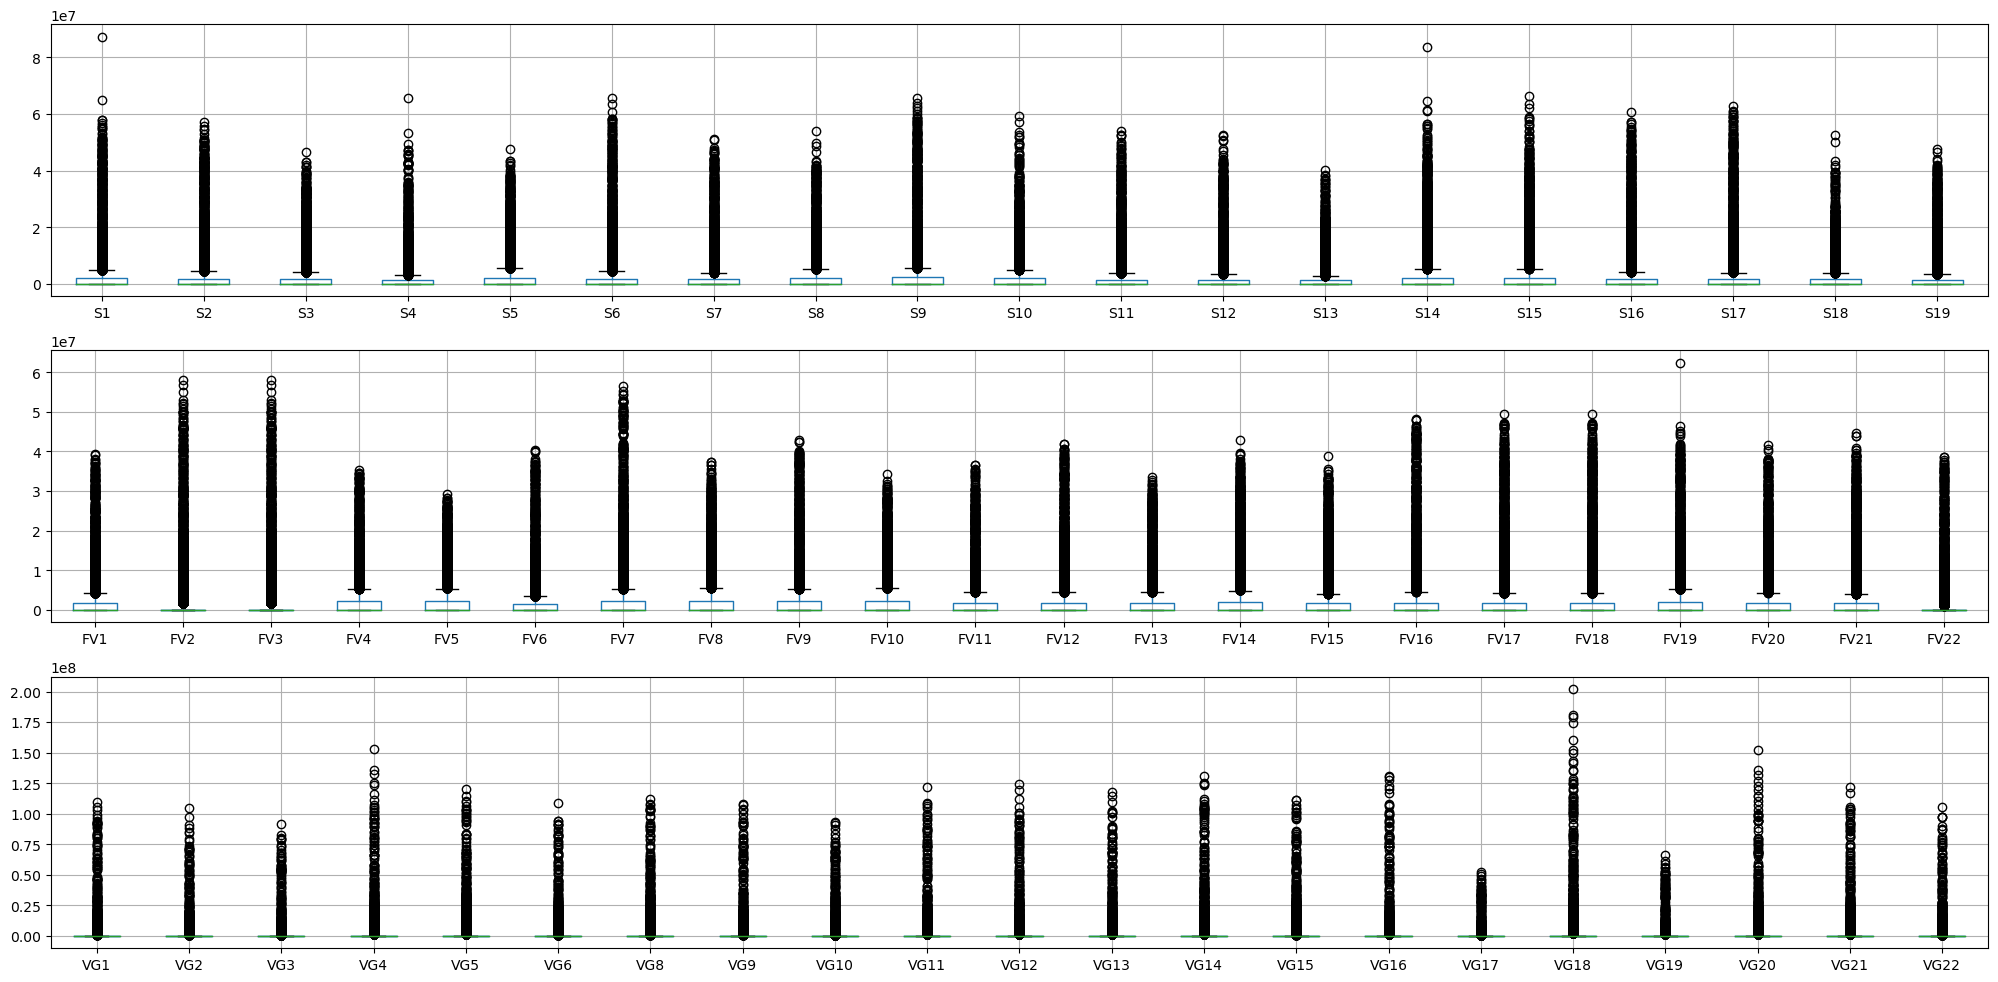

In [55]:
import matplotlib.pyplot as plt

# Dividir el DataFrame en tres partes
dt_List_Comp_Crudos = dt_List_Comp.iloc[:, :19]
dt_List_Comp_Fondos = dt_List_Comp.iloc[:, 19:41]  # 19+22=41
dt_List_Comp_Gas = dt_List_Comp.iloc[:,41:]  # Desde la fila 41 hasta el final

# Crear subgráficos para cada parte
fig, axs = plt.subplots(3, 1, figsize=(25, 12))

# Generar boxplots para cada parte
dt_List_Comp_Crudos.boxplot(ax=axs[0])
dt_List_Comp_Fondos.boxplot(ax=axs[1])
dt_List_Comp_Gas.boxplot(ax=axs[2])

# Guardar la figura
plt.savefig('Graficas/CRFVVG_Boxplot.png')

# Mostrar los boxplots
plt.show()



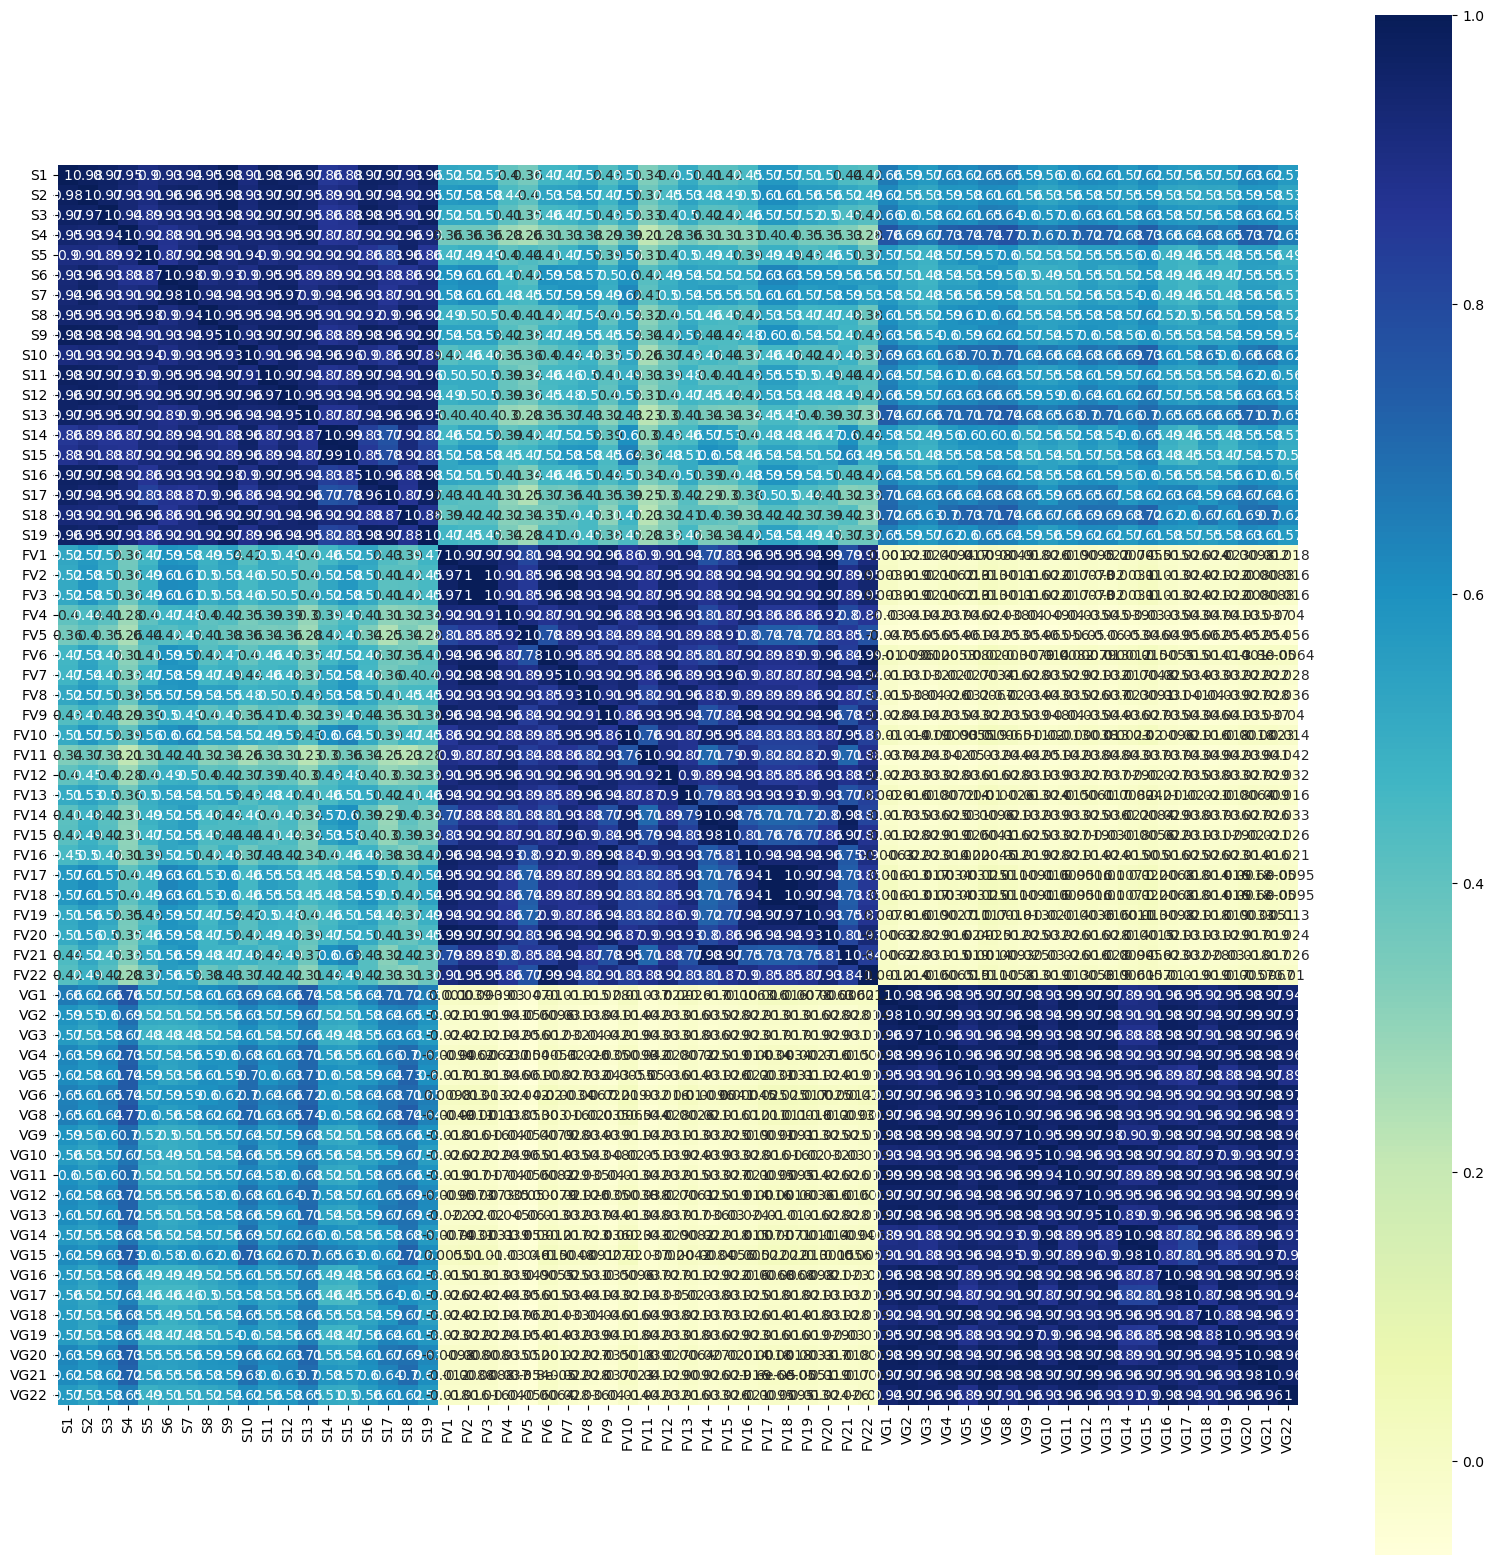

In [61]:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(dt_List_Comp.corr(), square=True, annot=True, cmap="YlGnBu")
plt.savefig("Graficas/heatmapCrudosFondosGases.png") 

## Tercer Dataset

In [22]:
#En las columnas están las muestras (82) y sus espectros ir
Datos_IR = pd.read_excel("Data/ASCI_IR.xlsx") #import dtframe ,skipinitialspace=True, skiprows=1

print(Datos_IR.shape)#Ver tamaño dataset
Datos_IR.head() #print dt frame

(82, 7469)


Unnamed: 0         0         1         2         3         4         5  \
0           0  0.011097  0.011199  0.010985  0.010543  0.010022  0.009558   
1           1  0.012468  0.012486  0.012449  0.012386  0.012352  0.012396   
2           2  0.018689  0.018286  0.017887  0.017561  0.017360  0.017291   
3           3  0.015869  0.015885  0.015737  0.015513  0.015276  0.015056   
4           4  0.006940  0.006977  0.006766  0.006420  0.006081  0.005889   

          6         7         8  ...      7458      7459      7460      7461  \
0  0.009238  0.009085  0.009071  ...  0.007546  0.007546  0.007545  0.007542   
1  0.012543  0.012782  0.013081  ...  0.003964  0.003966  0.003967  0.003967   
2  0.017324  0.017413  0.017528  ...  0.000043  0.000035  0.000026  0.000016   
3  0.014842  0.014605  0.014319  ...  0.011477  0.011465  0.011455  0.011450   
4  0.005934  0.006241  0.006779  ...  0.003165  0.003165  0.003163  0.003158   

       7462      7463      7464      7465      7466      7467  
0  0.007537  0.007530  0.007522  0.007512  0.007503  0.007494  
1  0.003967  0.003969  0.003970  0.003973  0.003975  0.003976  
2  0.000008  0.000003  0.000000  0.000001  0.000006  0.000013  
3  0.011447  0.011448  0.011453  0.011460  0.011469  0.011480  
4  0.003152  0.003147  0.003144  0.003142  0.003143  0.003145  

[5 rows x 7469 columns]

In [23]:
Datos_IR=Datos_IR.drop(Datos_IR.columns[0], axis=1)
print(Datos_IR.shape)
Datos_IR.head()

(82, 7468)


0         1         2         3         4         5         6     \
0  0.011097  0.011199  0.010985  0.010543  0.010022  0.009558  0.009238   
1  0.012468  0.012486  0.012449  0.012386  0.012352  0.012396  0.012543   
2  0.018689  0.018286  0.017887  0.017561  0.017360  0.017291  0.017324   
3  0.015869  0.015885  0.015737  0.015513  0.015276  0.015056  0.014842   
4  0.006940  0.006977  0.006766  0.006420  0.006081  0.005889  0.005934   

       7         8         9     ...      7458      7459      7460      7461  \
0  0.009085  0.009071  0.009146  ...  0.007546  0.007546  0.007545  0.007542   
1  0.012782  0.013081  0.013398  ...  0.003964  0.003966  0.003967  0.003967   
2  0.017413  0.017528  0.017675  ...  0.000043  0.000035  0.000026  0.000016   
3  0.014605  0.014319  0.013989  ...  0.011477  0.011465  0.011455  0.011450   
4  0.006241  0.006779  0.007492  ...  0.003165  0.003165  0.003163  0.003158   

       7462      7463      7464      7465      7466      7467  
0  0.007537  0.007530  0.007522  0.007512  0.007503  0.007494  
1  0.003967  0.003969  0.003970  0.003973  0.003975  0.003976  
2  0.000008  0.000003  0.000000  0.000001  0.000006  0.000013  
3  0.011447  0.011448  0.011453  0.011460  0.011469  0.011480  
4  0.003152  0.003147  0.003144  0.003142  0.003143  0.003145  

[5 rows x 7468 columns]

In [24]:
# IR transpose

Datos_IR = Datos_IR.transpose()
print(Datos_IR.shape)
Datos_IR.head()

(7468, 82)


0         1         2         3         4         5         6   \
0  0.011097  0.012468  0.018689  0.015869  0.006940  0.006935  0.016425   
1  0.011199  0.012486  0.018286  0.015885  0.006977  0.007533  0.015106   
2  0.010985  0.012449  0.017887  0.015737  0.006766  0.008007  0.013928   
3  0.010543  0.012386  0.017561  0.015513  0.006420  0.008331  0.013067   
4  0.010022  0.012352  0.017360  0.015276  0.006081  0.008482  0.012639   

         7         8         9   ...        72        73        74        75  \
0  0.025610  0.011233  0.015542  ...  0.037838  0.025816  0.017109  0.014263   
1  0.025668  0.010532  0.015678  ...  0.036763  0.026283  0.017330  0.014050   
2  0.025952  0.010026  0.015707  ...  0.035667  0.026582  0.017588  0.013578   
3  0.026408  0.009778  0.015686  ...  0.034714  0.026754  0.017884  0.012980   
4  0.026994  0.009770  0.015676  ...  0.034033  0.026838  0.018222  0.012398   

         76        77        78        79        80        81  
0  0.040873  0.012003  0.015255  0.014519  0.012098  0.036427  
1  0.040392  0.012234  0.014849  0.015313  0.013569  0.036521  
2  0.039723  0.012054  0.014527  0.016455  0.014856  0.036305  
3  0.038974  0.011595  0.014288  0.017791  0.015892  0.035926  
4  0.038242  0.011025  0.014117  0.019159  0.016641  0.035521  

[5 rows x 82 columns]

In [25]:
Datos_IR=Datos_IR.drop(Datos_IR.columns[0], axis=1)
Datos_IR.head()

1         2         3         4         5         6         7   \
0  0.012468  0.018689  0.015869  0.006940  0.006935  0.016425  0.025610   
1  0.012486  0.018286  0.015885  0.006977  0.007533  0.015106  0.025668   
2  0.012449  0.017887  0.015737  0.006766  0.008007  0.013928  0.025952   
3  0.012386  0.017561  0.015513  0.006420  0.008331  0.013067  0.026408   
4  0.012352  0.017360  0.015276  0.006081  0.008482  0.012639  0.026994   

         8         9         10  ...        72        73        74        75  \
0  0.011233  0.015542  0.006624  ...  0.037838  0.025816  0.017109  0.014263   
1  0.010532  0.015678  0.006846  ...  0.036763  0.026283  0.017330  0.014050   
2  0.010026  0.015707  0.006878  ...  0.035667  0.026582  0.017588  0.013578   
3  0.009778  0.015686  0.006786  ...  0.034714  0.026754  0.017884  0.012980   
4  0.009770  0.015676  0.006664  ...  0.034033  0.026838  0.018222  0.012398   

         76        77        78        79        80        81  
0  0.040873  0.012003  0.015255  0.014519  0.012098  0.036427  
1  0.040392  0.012234  0.014849  0.015313  0.013569  0.036521  
2  0.039723  0.012054  0.014527  0.016455  0.014856  0.036305  
3  0.038974  0.011595  0.014288  0.017791  0.015892  0.035926  
4  0.038242  0.011025  0.014117  0.019159  0.016641  0.035521  

[5 rows x 81 columns]

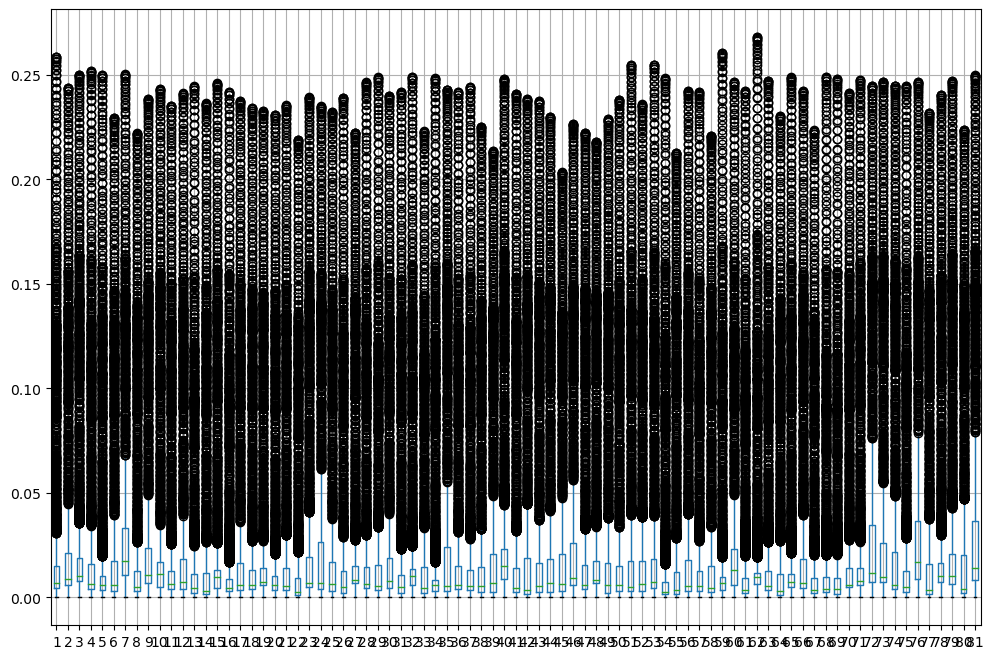

In [26]:
plt.figure(figsize=(12, 8))
Datos_IR.boxplot()

plt.savefig('Graficas/BoxplotASCI.png')

plt.show()


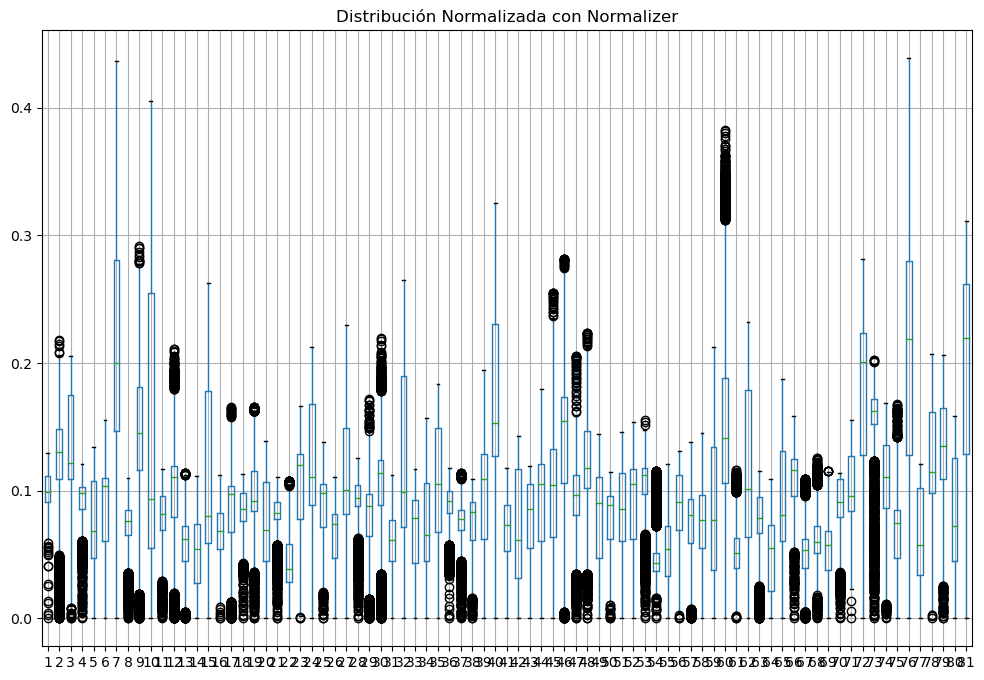

In [30]:
from sklearn.preprocessing import Normalizer

# Crear una instancia del normalizador
normalizer = Normalizer()

# Normalizar los datos
Datos_IR_normalized = normalizer.fit_transform(Datos_IR)

# Convertir de nuevo a DataFrame
Datos_IR_normalized = pd.DataFrame(Datos_IR_normalized, columns=Datos_IR.columns)

# Visualizar boxplots
plt.figure(figsize=(12, 8))
Datos_IR_normalized.boxplot()
plt.title('Distribución Normalizada con Normalizer')
plt.savefig('Graficas/BoxplotASCI_Normalized.png')
plt.show()


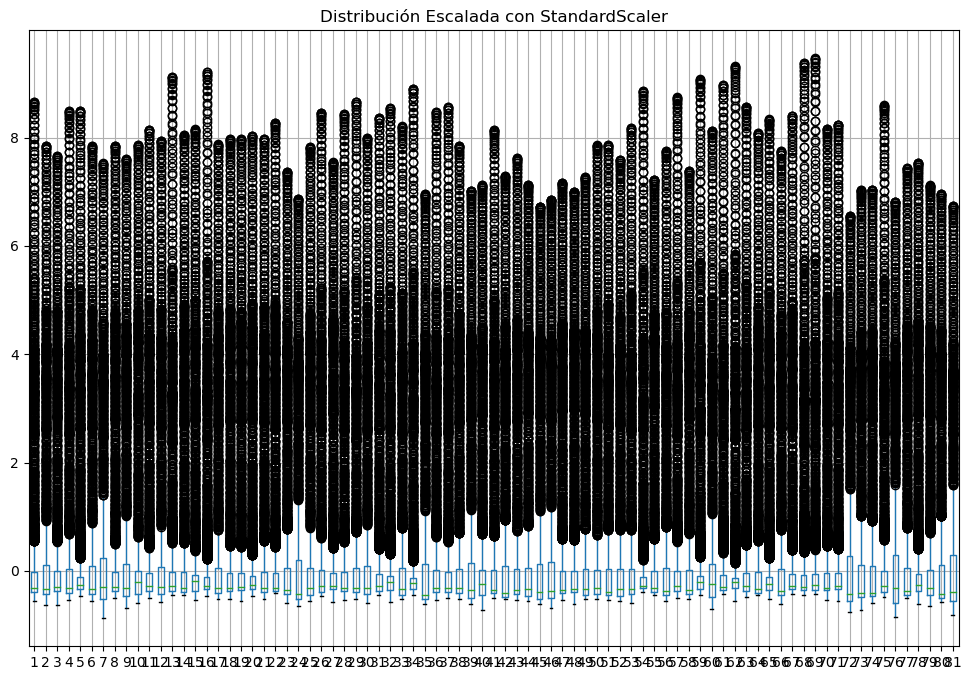

In [29]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia del escalador estándar
scaler = StandardScaler()

# Escalar cada subconjunto de datos
Datos_IR_scaled = scaler.fit_transform(Datos_IR)

# Convertir de nuevo a DataFrame
Datos_IR_scaled = pd.DataFrame(Datos_IR_scaled, columns=Datos_IR.columns)

# Visualizar boxplots
plt.figure(figsize=(12, 8))
Datos_IR_scaled.boxplot()
plt.title('Distribución Escalada con StandardScaler')
plt.savefig('Graficas/BoxplotASCI_Scaled.png')
plt.show()



In [8]:
# Calcular los valores máximo, mínimo y promedio de todo el dataset
valor_maximo_total = Datos_IR.max().max()
valor_minimo_total = Datos_IR.min().min()
valor_promedio_total = Datos_IR.mean().mean()
varianza_total = Datos_IR.values.var()


print("\nValor máximo total:", f'{valor_maximo_total:.10f}')
print("Valor mínimo total:", f'{valor_minimo_total:.10f}')
print("Valor promedio total:", f'{valor_promedio_total:.10f}')
print("Valor promedio total:", f'{varianza_total:.10f}')




Valor máximo total: 0.2679974813
Valor mínimo total: 0.0000000000
Valor promedio total: 0.0157675283
Valor promedio total: 0.0008176257


In [10]:
#  Máximo, mínimo, promedio de cada columna
valores_maximos = Datos_IR.max()
valores_minimos = Datos_IR.min()
valores_promedios = Datos_IR.mean()
varianza_datos = Datos_IR.var()


print("Valores máximos por columna:")
print(valores_maximos)
print("\nValores mínimos por columna:")
print(valores_minimos)
print("\nValores promedio por columna:")
print(valores_promedios)
print("\nVarianza por columna:")
print(varianza_datos)

Valores máximos por columna:
1     0.258688
2     0.243894
3     0.250120
4     0.251906
5     0.249926
        ...   
77    0.231797
78    0.240424
79    0.246972
80    0.223724
81    0.249803
Length: 81, dtype: float64

Valores mínimos por columna:
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
     ... 
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
Length: 81, dtype: float64

Valores promedio por columna:
1     0.015505
2     0.018163
3     0.019004
4     0.015228
5     0.012925
        ...   
77    0.014494
78    0.017912
79    0.020397
80    0.016944
81    0.026878
Length: 81, dtype: float64

Varianza por columna:
1     0.000789
2     0.000828
3     0.000912
4     0.000777
5     0.000778
        ...   
77    0.000854
78    0.000871
79    0.001014
80    0.000884
81    0.001095
Length: 81, dtype: float64


In [33]:
#Datos primera Columna
DatosMuestra = Datos_IR.iloc[:, 0]

print(DatosMuestra)

valor_maximo = DatosMuestra.max()
valor_minimo = DatosMuestra.min()
valor_promedio = DatosMuestra.mean()
varianza_datos = DatosMuestra.var()


# Formatear los valores mínimos y promedio a más decimales
valor_maximo_formateado = f'{valor_maximo:.10f}'
valor_minimo_formateado = f'{valor_minimo:.10f}'
valor_promedio_formateado = f'{valor_promedio:.10f}'
varianza_datos_formateada = f'{varianza_datos:.10f}'


# Mostrar los resultados
print("Valores para la primera columna:")
print("Valor máximo:", valor_maximo_formateado)
print("Valor mínimo:", valor_minimo_formateado)
print("Valor promedio:", valor_promedio_formateado)
print("Varianza:", varianza_datos_formateada)


0       0.012468
1       0.012486
2       0.012449
3       0.012386
4       0.012352
          ...   
7463    0.003969
7464    0.003970
7465    0.003973
7466    0.003975
7467    0.003976
Name: 1, Length: 7468, dtype: float64
Valores para la primera columna:
Valor máximo: 0.2586882959
Valor mínimo: 0.0000000000
Valor promedio: 0.0155052099
Varianza: 0.0007886667


In [15]:
#Datos segunda columna
DatosMuestra = Datos_IR.iloc[:, 1]

print(DatosMuestra)

valor_maximo = DatosMuestra.max()
valor_minimo = DatosMuestra.min()
valor_promedio = DatosMuestra.mean()
varianza_datos = DatosMuestra.var()


# Formatear los valores mínimos y promedio a más decimales
valor_minimo_formateado = f'{valor_minimo:.10f}'
valor_promedio_formateado = f'{valor_promedio:.10f}'
varianza_datos_formateada = f'{varianza_datos:.10f}'


# Mostrar los resultados
print("Valores para la primera columna:")
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo_formateado)
print("Valor promedio:", valor_promedio_formateado)
print("Varianza:", varianza_datos_formateada)


0       0.018689
1       0.018286
2       0.017887
3       0.017561
4       0.017360
          ...   
7463    0.000003
7464    0.000000
7465    0.000001
7466    0.000006
7467    0.000013
Name: 2, Length: 7468, dtype: float64
Valores para la primera columna:
Valor máximo: 0.2438940147100344
Valor mínimo: 0.0000000000
Valor promedio: 0.0181626671
Varianza: 0.0008281713


In [22]:
#Datos columna 39
DatosMuestra = Datos_IR.iloc[:, 38]

print(DatosMuestra)

valor_maximo = DatosMuestra.max()
valor_minimo = DatosMuestra.min()
valor_promedio = DatosMuestra.mean()
varianza_datos = DatosMuestra.var()


# Formatear los valores mínimos y promedio a más decimales
valor_minimo_formateado = f'{valor_minimo:.10f}'
valor_promedio_formateado = f'{valor_promedio:.10f}'
varianza_datos_formateada = f'{varianza_datos:.10f}'


# Mostrar los resultados
print("Valores para la primera columna:")
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo_formateado)
print("Valor promedio:", valor_promedio_formateado)
print("Varianza:", varianza_datos_formateada)


0       0.020127
1       0.020466
2       0.020620
3       0.020551
4       0.020277
          ...   
7463    0.000039
7464    0.000030
7465    0.000021
7466    0.000010
7467    0.000000
Name: 39, Length: 7468, dtype: float64
Valores para la primera columna:
Valor máximo: 0.2135376541384602
Valor mínimo: 0.0000000000
Valor promedio: 0.0169005620
Varianza: 0.0007854219


In [35]:
#Datos columna 81
DatosMuestra = Datos_IR.iloc[:,79]

print(DatosMuestra)

valor_maximo = DatosMuestra.max()
valor_minimo = DatosMuestra.min()
valor_promedio = DatosMuestra.mean()
varianza_datos = DatosMuestra.var()


# Formatear los valores mínimos y promedio a más decimales
valor_minimo_formateado = f'{valor_minimo:.10f}'
valor_promedio_formateado = f'{valor_promedio:.10f}'
varianza_datos_formateada = f'{varianza_datos:.10f}'


# Mostrar los resultados
print("Valores para la primera columna:")
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo_formateado)
print("Valor promedio:", valor_promedio_formateado)
print("Varianza:", varianza_datos_formateada)


0       0.012098
1       0.013569
2       0.014856
3       0.015892
4       0.016641
          ...   
7463    0.004210
7464    0.004211
7465    0.004208
7466    0.004203
7467    0.004196
Name: 80, Length: 7468, dtype: float64
Valores para la primera columna:
Valor máximo: 0.2237237738091378
Valor mínimo: 0.0000000000
Valor promedio: 0.0169436829
Varianza: 0.0008835885


In [36]:
#Datos columna 82
DatosMuestra = Datos_IR.iloc[:, 80]

print(DatosMuestra)

valor_maximo = DatosMuestra.max()
valor_minimo = DatosMuestra.min()
valor_promedio = DatosMuestra.mean()
varianza_datos = DatosMuestra.var()


# Formatear los valores mínimos y promedio a más decimales
valor_minimo_formateado = f'{valor_minimo:.10f}'
valor_promedio_formateado = f'{valor_promedio:.10f}'
varianza_datos_formateada = f'{varianza_datos:.10f}'


# Mostrar los resultados
print("Valores para la primera columna:")
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo_formateado)
print("Valor promedio:", valor_promedio_formateado)
print("Varianza:", varianza_datos_formateada)


0       0.036427
1       0.036521
2       0.036305
3       0.035926
4       0.035521
          ...   
7463    0.000015
7464    0.000013
7465    0.000010
7466    0.000005
7467    0.000000
Name: 81, Length: 7468, dtype: float64
Valores para la primera columna:
Valor máximo: 0.2498031876882205
Valor mínimo: 0.0000000000
Valor promedio: 0.0268782302
Varianza: 0.0010950808


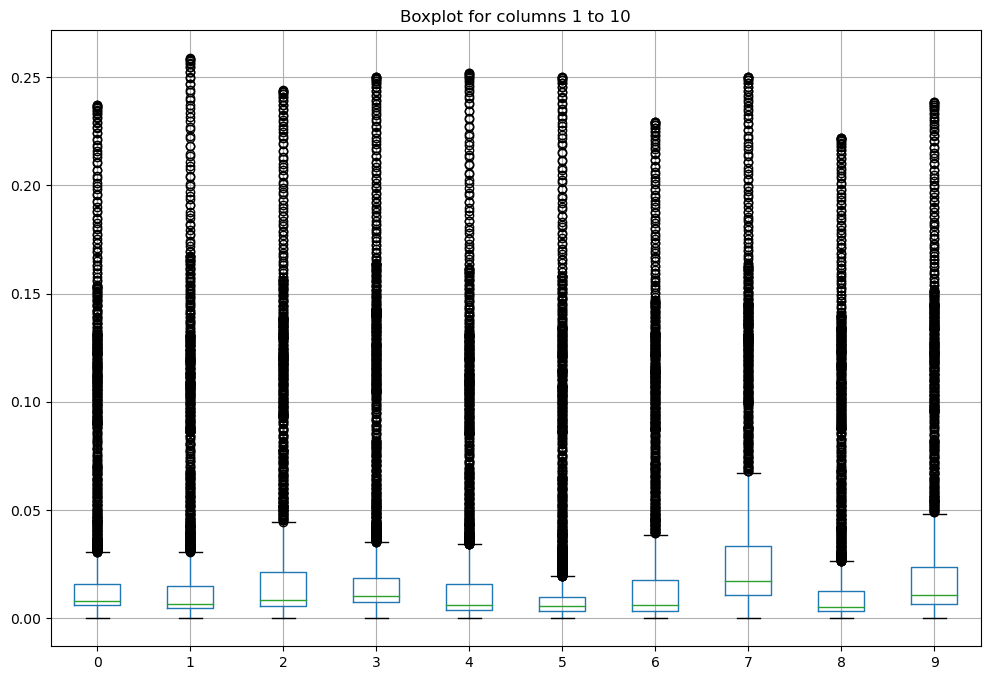

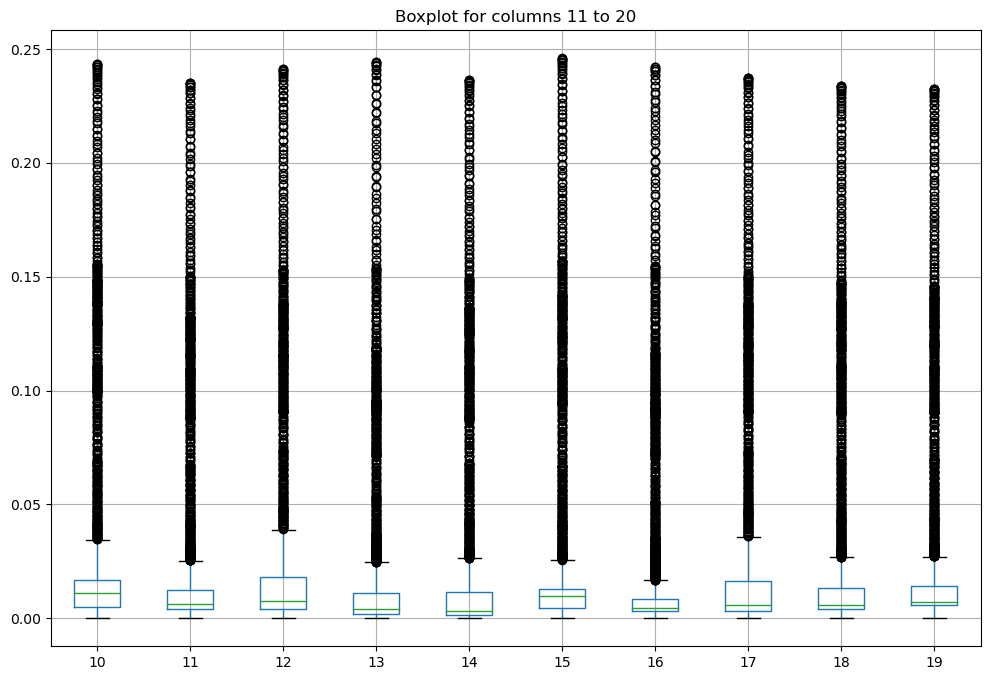

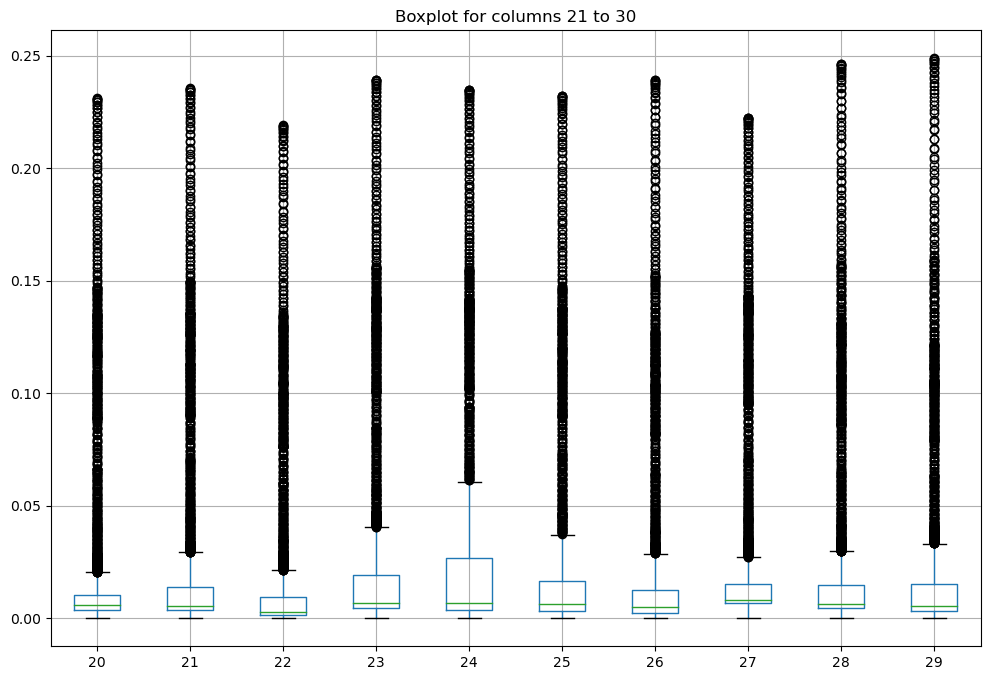

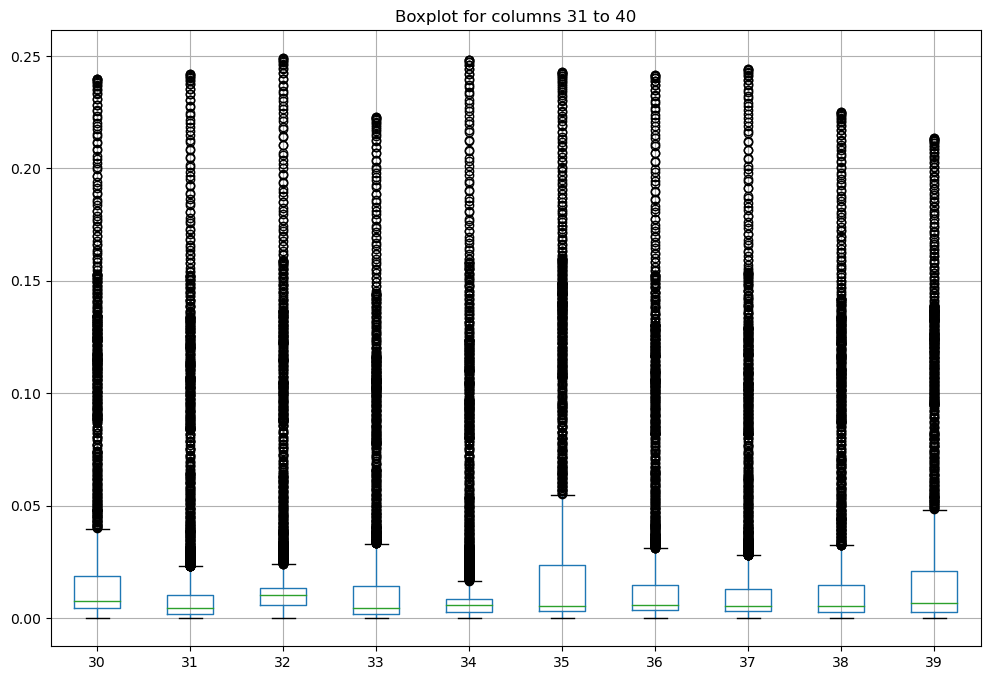

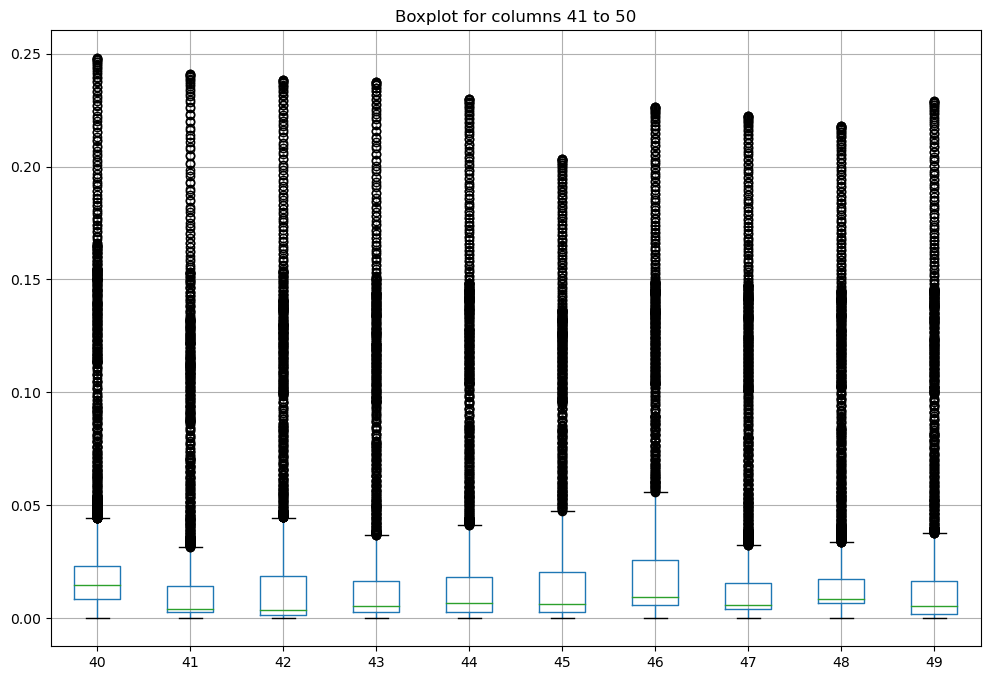

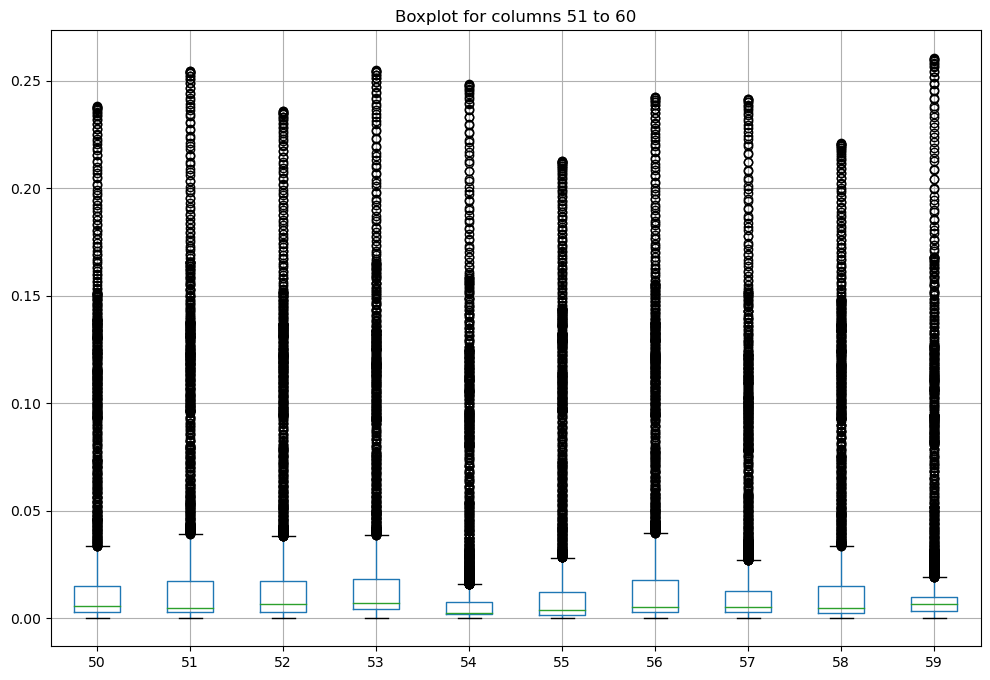

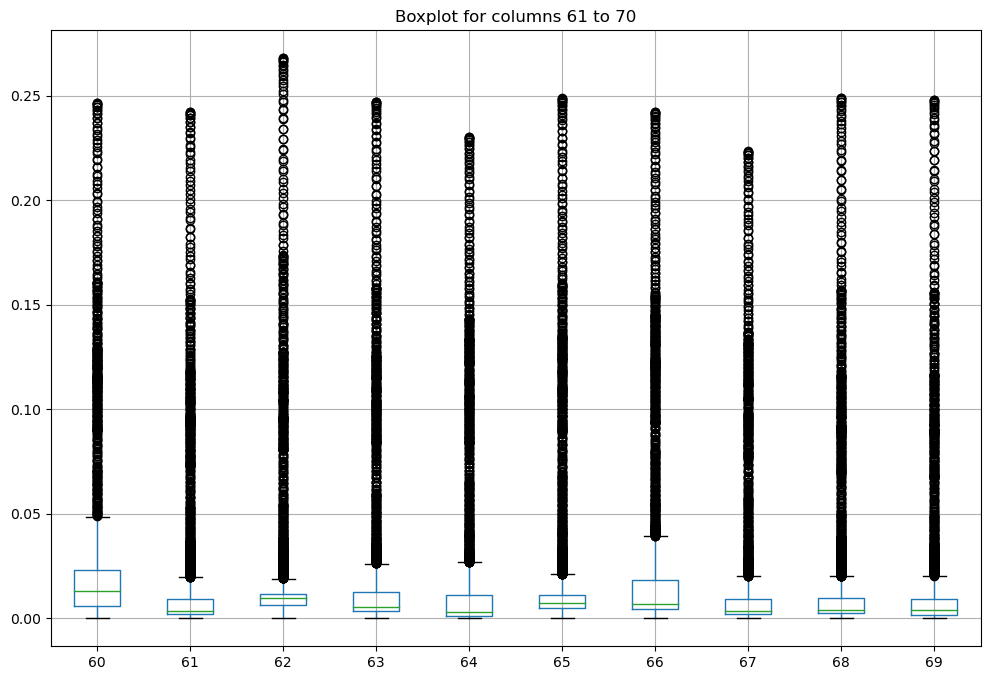

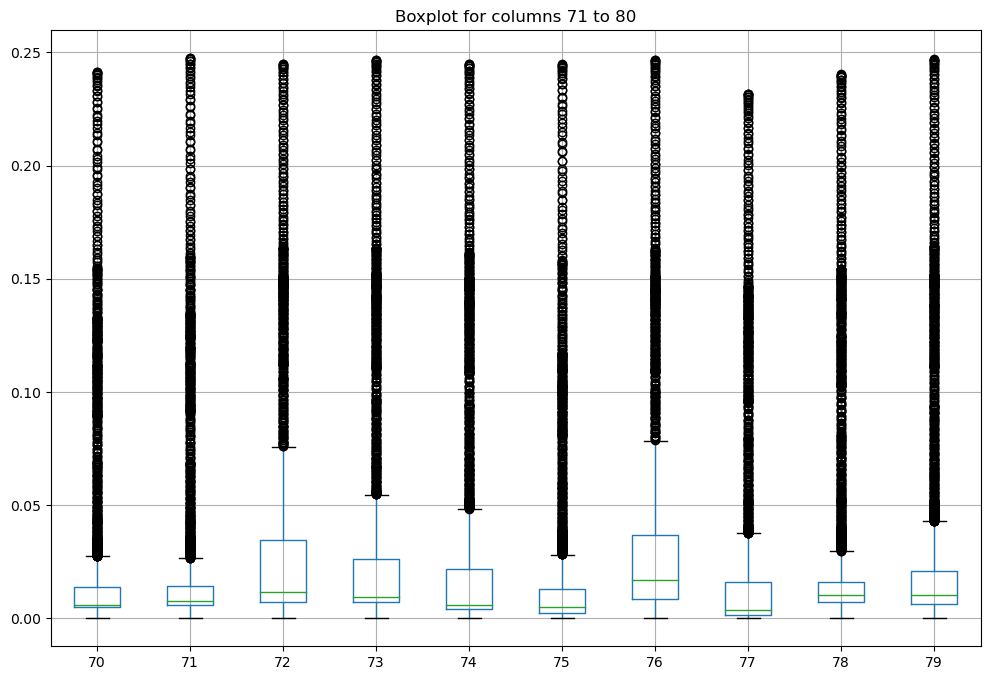

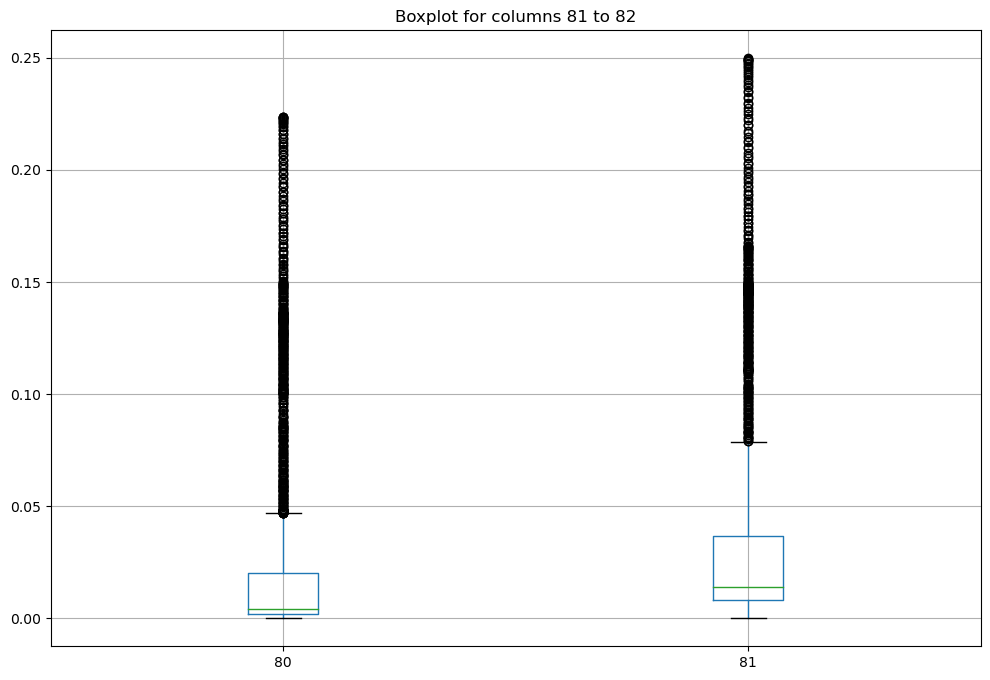

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que Datos_IR es tu DataFrame con 82 columnas
num_columns = Datos_IR.shape[1]
subset_size = 10

for i in range(0, num_columns, subset_size):
    subset = Datos_IR.iloc[:, i:i+subset_size]
    plt.figure(figsize=(12, 8))
    subset.boxplot()
    plt.title(f'Boxplot for columns {i+1} to {min(i+subset_size, num_columns)}')
    plt.show()

In [30]:
import pandas as pd

# Suponiendo que Datos_IR es tu DataFrame
columna = Datos_IR.iloc[:, 1]  # Primera columna

# Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR (rango intercuartil)
Q1 = columna.quantile(0.25)
Q3 = columna.quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los valores outliers
outliers = columna[(columna < lower_bound) | (columna > upper_bound)]
num_outliers = outliers.count()

# Calcular el porcentaje de outliers
total_values = columna.count()
percentage_outliers = (num_outliers / total_values) * 100

print(f"Porcentaje de outliers en la primera columna: {percentage_outliers:.2f}%")


Porcentaje de outliers en la primera columna: 6.94%


Cantidad de valores por encima de la línea de 'máximo': 568
Porcentaje de valores por encima de la línea de 'máximo': 7.61%
Cantidad de valores que no son atípicos: 6900
Porcentaje de valores que no son atípicos: 92.39%


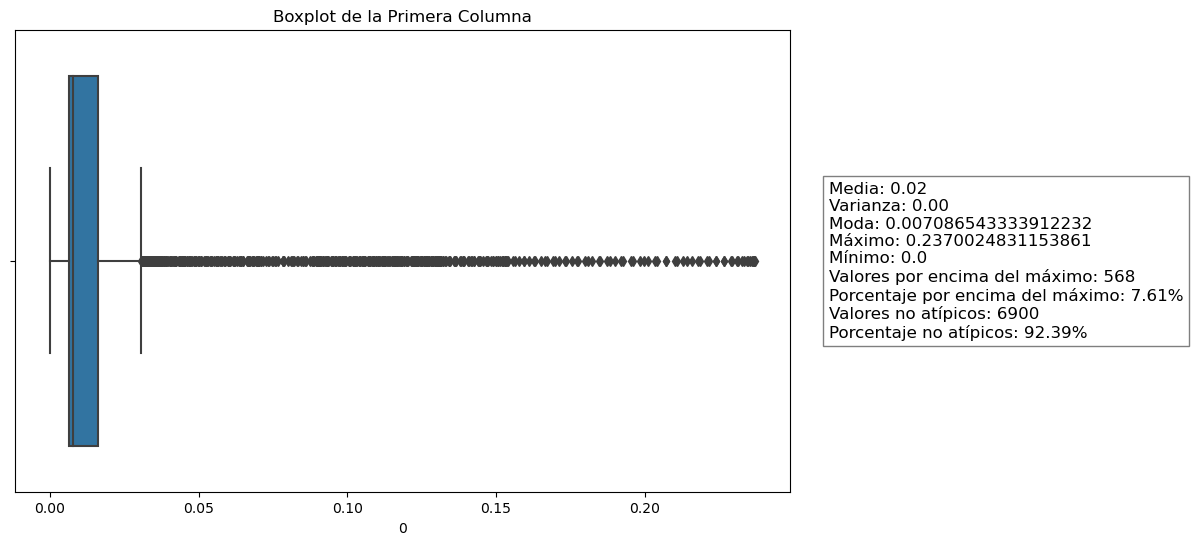

In [34]:
# Analisis primera columna Dator IR

# Selección de la primera columna
columna = Datos_IR.iloc[:, 0]

# Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR (rango intercuartílico)
Q1 = columna.quantile(0.25)
Q3 = columna.quantile(0.75)
IQR = Q3 - Q1

# Calcular el límite superior para los valores no considerados outliers
upper_bound = Q3 + 1.5 * IQR

# Contar los valores que están por encima de este límite superior (outliers)
values_above_upper_bound = columna[columna > upper_bound]
num_values_above_upper_bound = values_above_upper_bound.count()

# Calcular el porcentaje de valores que están por encima de este límite superior
total_values = columna.count()
percentage_values_above_upper_bound = (num_values_above_upper_bound / total_values) * 100

# Contar los valores que no son outliers
values_not_outliers = columna[columna <= upper_bound]
num_values_not_outliers = values_not_outliers.count()

# Calcular el porcentaje de valores que no son outliers
percentage_values_not_outliers = (num_values_not_outliers / total_values) * 100

# Imprimir resultados
print(f"Cantidad de valores por encima de la línea de 'máximo': {num_values_above_upper_bound}")
print(f"Porcentaje de valores por encima de la línea de 'máximo': {percentage_values_above_upper_bound:.2f}%")
print(f"Cantidad de valores que no son atípicos: {num_values_not_outliers}")
print(f"Porcentaje de valores que no son atípicos: {percentage_values_not_outliers:.2f}%")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=columna)
plt.title('Boxplot de la Primera Columna')

# Mostrar las estadísticas en el gráfico
info_text = f"""Media: {columna.mean():.2f}
Varianza: {columna.var():.2f}
Moda: {columna.mode()[0]}
Máximo: {columna.max()}
Mínimo: {columna.min()}
Valores por encima del máximo: {num_values_above_upper_bound}
Porcentaje por encima del máximo: {percentage_values_above_upper_bound:.2f}%
Valores no atípicos: {num_values_not_outliers}
Porcentaje no atípicos: {percentage_values_not_outliers:.2f}%"""

# Colocar el texto de manera vertical al lado del gráfico
plt.gca().text(1.05, 0.5, info_text, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

Cantidad de valores por encima de la línea de 'máximo': 568
Porcentaje de valores por encima de la línea de 'máximo': 7.61%


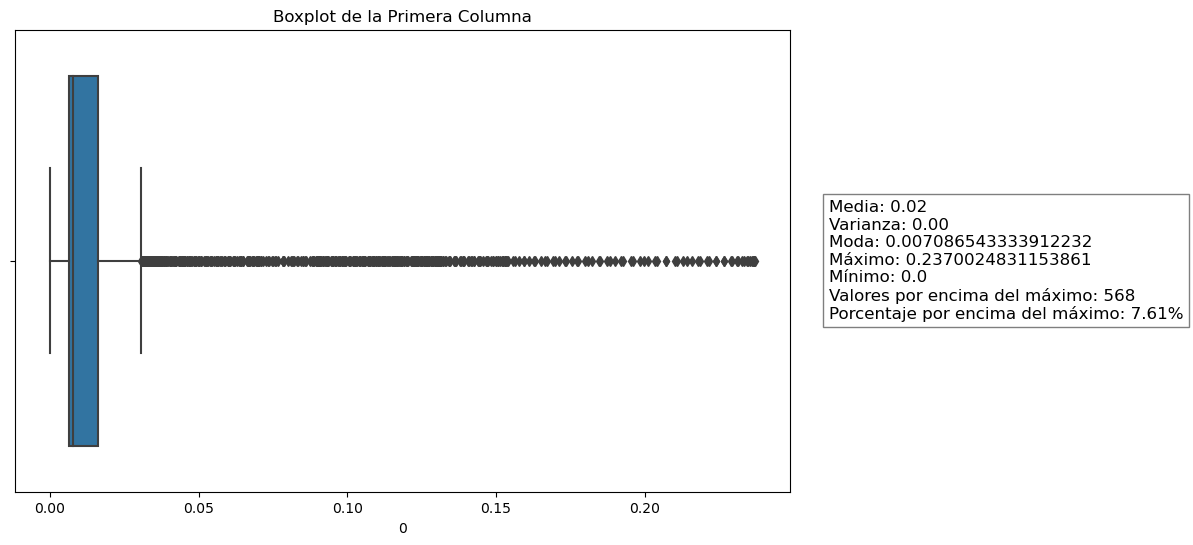

In [33]:
columna = Datos_IR.iloc[:, 0]

Q1 = columna.quantile(0.25)
Q3 = columna.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

values_above_upper_bound = columna[columna > upper_bound]
num_values_above_upper_bound = values_above_upper_bound.count()

total_values = columna.count()
percentage_values_above_upper_bound = (num_values_above_upper_bound / total_values) * 100

# Imprimir resultados
print(f"Cantidad de valores por encima de la línea de 'máximo': {num_values_above_upper_bound}")
print(f"Porcentaje de valores por encima de la línea de 'máximo': {percentage_values_above_upper_bound:.2f}%")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=columna)
plt.title('Boxplot de la Primera Columna')

# Mostrar las estadísticas en el gráfico
info_text = f"""Media: {columna.mean():.2f}
Varianza: {columna.var():.2f}
Moda: {columna.mode()[0]}
Máximo: {columna.max()}
Mínimo: {columna.min()}
Valores por encima del máximo: {num_values_above_upper_bound}
Porcentaje por encima del máximo: {percentage_values_above_upper_bound:.2f}%"""

# Colocar el texto de manera vertical al lado del gráfico
plt.gca().text(1.05, 0.5, info_text, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

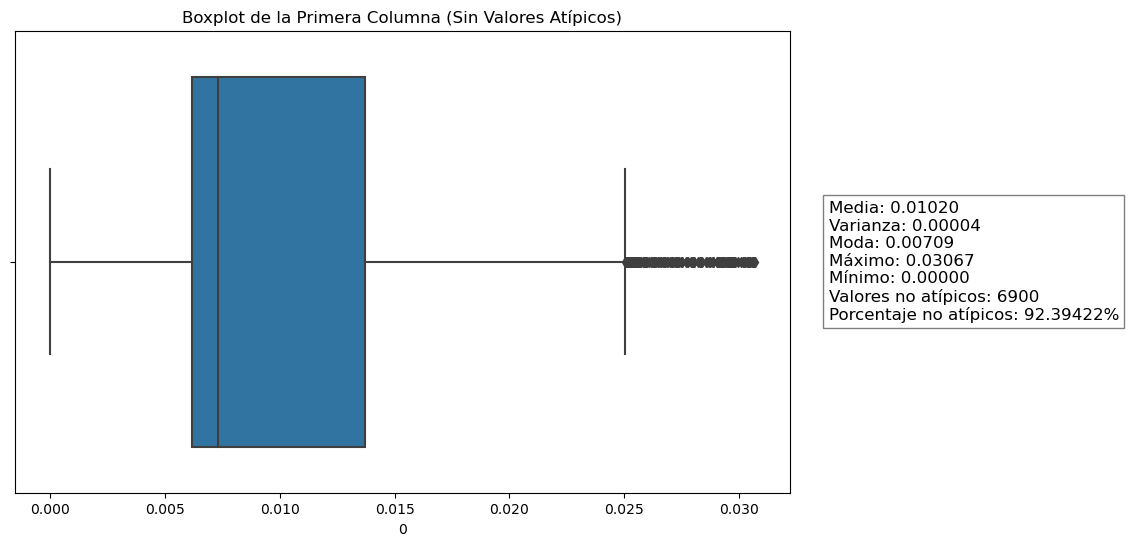

In [38]:
# Selección de la primera columna
columna = Datos_IR.iloc[:, 0]

# Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR (rango intercuartílico)
Q1 = columna.quantile(0.25)
Q3 = columna.quantile(0.75)
IQR = Q3 - Q1

# Calcular el límite superior para los valores no considerados outliers
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que no son atípicos
non_outliers = columna[columna <= upper_bound]

# Cálculo de estadísticas para los valores no atípicos
media = non_outliers.mean()
varianza = non_outliers.var()
moda = non_outliers.mode()[0]  # Si hay múltiples modas, selecciona la primera
maximo = non_outliers.max()
minimo = non_outliers.min()

# Contar los valores no atípicos
num_values_not_outliers = non_outliers.count()

# Calcular el porcentaje de valores que no son atípicos
total_values = columna.count()
percentage_values_not_outliers = (num_values_not_outliers / total_values) * 100

# Crear el boxplot sin valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=non_outliers)
plt.title('Boxplot de la Primera Columna (Sin Valores Atípicos)')

# Mostrar las estadísticas en el gráfico
info_text = f"""Media: {media:.5f}
Varianza: {varianza:.5f}
Moda: {moda:.5f}
Máximo: {maximo:.5f}
Mínimo: {minimo:.5f}
Valores no atípicos: {num_values_not_outliers}
Porcentaje no atípicos: {percentage_values_not_outliers:.5f}%"""

# Colocar el texto de manera vertical al lado del gráfico
plt.gca().text(1.05, 0.5, info_text, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

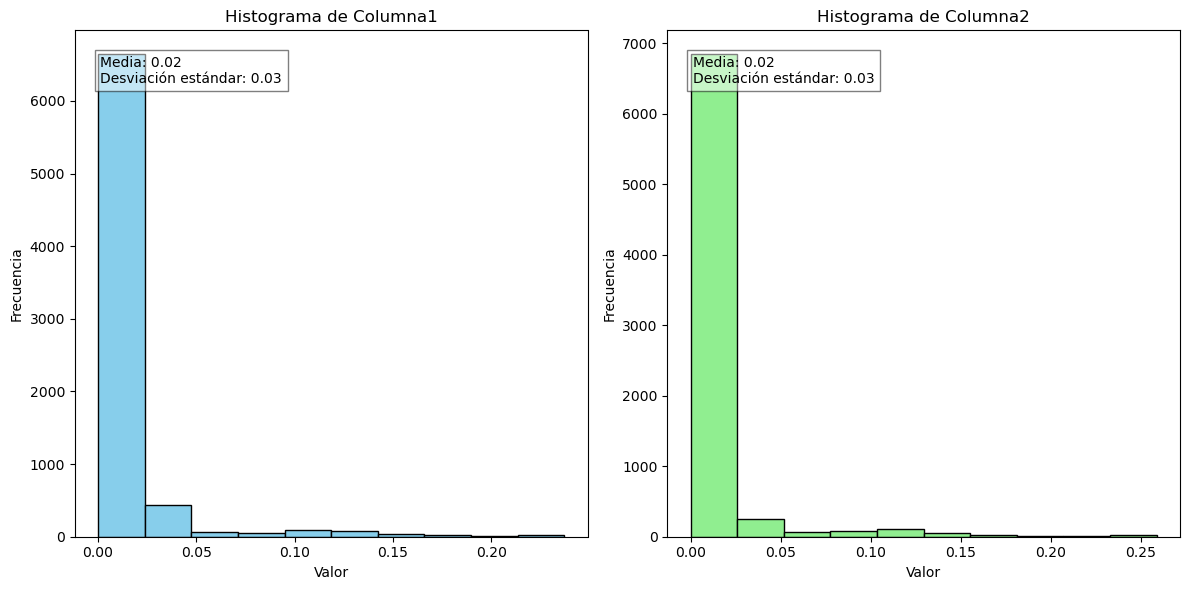

In [53]:
# Seleccionar las columnas
columna1 = Datos_IR.iloc[:, 0]  # Primera columna
columna2 = Datos_IR.iloc[:, 1]  # Segunda columna

# Calcular estadísticas para la Columna1
media_columna1 = columna1.mean()
std_columna1 = columna1.std()

# Calcular estadísticas para la Columna2
media_columna2 = columna2.mean()
std_columna2 = columna2.std()

# Generar histogramas para las dos primeras columnas del DataFrame
plt.figure(figsize=(12, 6))

# Histograma para la Columna1
plt.subplot(1, 2, 1)
plt.hist(columna1, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Columna1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
# Información relevante en infotext
info_text1 = f"Media: {media_columna1:.2f}\nDesviación estándar: {std_columna1:.2f}"
plt.gca().text(0.05, 0.95, info_text1, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Histograma para la Columna2
plt.subplot(1, 2, 2)
plt.hist(columna2, bins=10, color='lightgreen', edgecolor='black')
plt.title('Histograma de Columna2')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
# Información relevante en infotext
info_text2 = f"Media: {media_columna2:.2f}\nDesviación estándar: {std_columna2:.2f}"
plt.gca().text(0.05, 0.95, info_text2, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

In [6]:
#En las columnas están las muestras (82) y sus espectros ir
Datos_IR_Target = pd.read_excel("Data/ASCI_IR.xlsx", sheet_name='ASCI')#import dtframe ,skipinitialspace=True, skiprows=1

print(Datos_IR_Target.shape)#Ver tamaño dataset
Datos_IR_Target #print dt frame

(82, 1)


label
0      10
1      10
2      13
3      11
4      11
..    ...
77      8
78     10
79      9
80     11
81     12

[82 rows x 1 columns]